In [1]:
import uproot
import numpy as np 
import matplotlib.pyplot as plt
import vector
import awkward as ak
import iminuit
from iminuit import Minuit

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Use LHCb style for plots
#import mplhep as hep
#plt.style.use(hep.style.CMS)
#plt.rcParams["figure.figsize"] = (8,6)
#plt.rcParams['font.family'] = 'DejaVu Sans' # Change 'DejaVu Sans' to a font installed on your system


Just see what fonts available on the system so that we can adjust `rcParams['font.family']` if we wanted to use mlhep with LHCb

In [ ]:
#import matplotlib.font_manager

#fonts = set([f.name for f in matplotlib.font_manager.fontManager.ttflist])
#for font in sorted(fonts):
#    print(font)

## Run the following if we want to run over all the available data. if not, see the next markdown cell. 


Comment By `Mohamed`



In [2]:
available_trees = ['B2L0pbarpippim', 'B2L0pbarpippip', 'B2L0pbarKmpip', 'B2L0pbarKppip', 
                   'B2L0pbarKppim', 'B2L0pbarKpKm', 'B2L0pbarpp', 'B2L0pbarKpKp']

# Show available decay trees
print("Available decay trees:")
for idx, tree in enumerate(available_trees, 1):
    print(f"{idx}. {tree}")

# Get a physicist input for selected tree
tree_idx = int(input("Please select the number of your desired decay tree: ")) - 1
decay_tree = available_trees[tree_idx]

base_path = '/share/lazy/Bu2LambdaPHH/NTuples/RD/'
file_names = ['L0phh_18MU.root', 'L0phh_18MD.root', 'L0phh_17MU.root', 'L0phh_17MD.root', 
              'L0phh_16MU.root', 'L0phh_16MD.root', 'L0phh_15MU.root', 'L0phh_15MD.root']

data = [f'{base_path}{file_name}:{decay_tree}/DecayTree' for file_name in file_names]

# print what the user has selected
print(f"Selected decay tree: {decay_tree}")

Available decay trees:
1. B2L0pbarpippim
2. B2L0pbarpippip
3. B2L0pbarKmpip
4. B2L0pbarKppip
5. B2L0pbarKppim
6. B2L0pbarKpKm
7. B2L0pbarpp
8. B2L0pbarKpKp
Selected decay tree: B2L0pbarKpKm


## Run these only if we want to look for a specific data file not all of them

If you want to generate a plot for each year seprately (now for lambda fit) run things in folder `scripts/fits/*`

In [ ]:
def get_file_name(year, magnet_direction):
    for file_name in file_names:
        if str(year) in file_name and magnet_direction.upper() in file_name:
            return file_name
    return None

In [ ]:
base_path = '/share/lazy/Bu2LambdaPHH/NTuples/RD/'

available_trees = ['B2L0pbarpippim', 'B2L0pbarpippip', 'B2L0pbarKmpip', 'B2L0pbarKppip', 
                   'B2L0pbarKppim', 'B2L0pbarKpKm', 'B2L0pbarpp', 'B2L0pbarKpKp']

available_years = ['15','16','17','18']
available_magnet = ['MU', 'MD']

for idx, year in enumerate(available_years, 1):
    print(f"{idx}. {year}")
year_idx = int(input("Please select the year: ")) - 1  # Subtract 1 from user input
year = available_years[year_idx]


# show available magnet choices
print("Available magnet directions:")
for idx, magnet in enumerate(['MU', 'MD'], 1):
    print(f"{idx}. {magnet}")
magnet_idx = int(input("Please select the number of your desired magnet: ")) - 1  # Subtract 1 from user input
magnet_direction = available_magnet[magnet_idx]

# Show available decay trees
print("Available decay trees:")
for idx, tree in enumerate(available_trees, 1):
    print(f"{idx}. {tree}")

# Get a physicist input for selected tree
tree_idx = int(input("Please select the number of your desired decay tree: ")) - 1  # Subtract 1 from user input
decay_tree = available_trees[tree_idx]

file_name = get_file_name(year, magnet_direction)

data = [f'{base_path}{file_name}:{decay_tree}/DecayTree']

#print(f"Selected decay tree: {decay_tree}")
#print(f"Selected year: {year}")
#print(f"Selected magnet direction: {magnet_direction}")

# combine the three print lines
print(f"You have chosen to analyse {decay_tree} for 20{year} data in the {magnet_direction} field.")


## You should run from here regardless of the previous data choice

In [3]:
plots_dir = f'plots/{decay_tree}'
if plots_dir is not None:
    import os
    os.makedirs(plots_dir, exist_ok=True)

In [4]:
arrs = uproot.concatenate(data)
print("Concantenated arrays are ready:")
print(f"Number of events: {len(arrs)}")
#print(f"Number of variables: {len(arrs[0])}")


Concantenated arrays are ready:
Number of events: 26584


In [5]:
def get_keys_by_prefix(arrs, prefix):
    """
    Get a list of keys in the Awkward Array `arrs` that start with `prefix`.

    Args:
        arrs (ak.Array): The Awkward Array to find keys in.
        prefix (str): The prefix of the keys to find.

    Returns:
        list: A list of keys that start with `prefix`.
    """
    return [key for key in arrs.fields if key.startswith(prefix)]

def print_keys(keys):
    for i in range(0, len(keys), 5):
        print(', '.join(keys[i:i+5]))
        


In [6]:
Bu_keys = get_keys_by_prefix(arrs, "Bu")
h1_keys = get_keys_by_prefix(arrs, "h1")
h2_keys = get_keys_by_prefix(arrs, "h2")
L0_keys = get_keys_by_prefix(arrs, "L0")
Lp_keys = get_keys_by_prefix(arrs, "Lp")
Lpi_keys = get_keys_by_prefix(arrs, "Lpi")
#print("Bu keys:")
#print_keys(Bu_keys)
print("\nh1 keys:")
print_keys(h1_keys)
#print("\nh2 keys:")
#print_keys(h2_keys)
#print("\nL0 keys:")
#print_keys(L0_keys)
#print("\nLp keys:")
#print_keys(Lp_keys)
#print("\nLpi keys:")
#print_keys(Lpi_keys)




h1 keys:
h1_DOCA12, h1_ETA, h1_MAXDOCA, h1_Y, h1_MC12TuneV2_ProbNNe
h1_MC12TuneV2_ProbNNmu, h1_MC12TuneV2_ProbNNpi, h1_MC12TuneV2_ProbNNk, h1_MC12TuneV2_ProbNNp, h1_MC12TuneV2_ProbNNghost
h1_MC12TuneV3_ProbNNe, h1_MC12TuneV3_ProbNNmu, h1_MC12TuneV3_ProbNNpi, h1_MC12TuneV3_ProbNNk, h1_MC12TuneV3_ProbNNp
h1_MC12TuneV3_ProbNNghost, h1_MC12TuneV4_ProbNNe, h1_MC12TuneV4_ProbNNmu, h1_MC12TuneV4_ProbNNpi, h1_MC12TuneV4_ProbNNk
h1_MC12TuneV4_ProbNNp, h1_MC12TuneV4_ProbNNghost, h1_MC15TuneV1_ProbNNe, h1_MC15TuneV1_ProbNNmu, h1_MC15TuneV1_ProbNNpi
h1_MC15TuneV1_ProbNNk, h1_MC15TuneV1_ProbNNp, h1_MC15TuneV1_ProbNNghost, h1_CosTheta, h1_OWNPV_X
h1_OWNPV_Y, h1_OWNPV_Z, h1_OWNPV_XERR, h1_OWNPV_YERR, h1_OWNPV_ZERR
h1_OWNPV_CHI2, h1_OWNPV_NDOF, h1_OWNPV_COV_, h1_IP_OWNPV, h1_IPCHI2_OWNPV
h1_ORIVX_X, h1_ORIVX_Y, h1_ORIVX_Z, h1_ORIVX_XERR, h1_ORIVX_YERR
h1_ORIVX_ZERR, h1_ORIVX_CHI2, h1_ORIVX_NDOF, h1_ORIVX_COV_, h1_P
h1_PT, h1_PE, h1_PX, h1_PY, h1_PZ
h1_M, h1_L0Calo_HCAL_realET, h1_L0Calo_HCAL_xProject

In [7]:
print("h2_ProbNNghost values:", arrs['h2_ProbNNghost'])

# Todo: investigate this with L0 distribution

h2_ProbNNghost values: [0.00276, 0.0087, 0.041, 0.00588, ..., 0.00285, 0.000498, 0.00105, 0.000691]


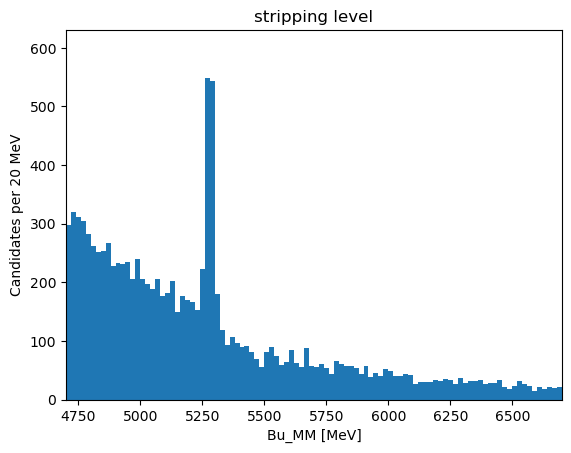

In [8]:
ax = plt.gca()
nC, bins, patches = plt.hist(arrs['Bu_MM'], bins=100, range=(4700,6700))
plt.title('stripping level')
ax.set_xlabel(r'Bu_MM [MeV]')
ax.set_ylabel('Candidates per 20 MeV')
plt.axis([4700, 6700, 0.,1.15* max(nC)])
plt.show()

In [9]:
h1_P = arrs['h1_P']
h1_PT = arrs['h1_PT']
h1_PE = arrs['h1_PE']
h1_PX = arrs['h1_PX']
h1_PY = arrs['h1_PY']
h1_PZ = arrs['h1_PZ']
h1_ID = arrs['h1_ID']
h1_TRACK_Type = arrs['h1_TRACK_Type']

In [10]:
h2_P = arrs['h2_P']
h2_PT = arrs['h2_PT']
h2_PE = arrs['h2_PE']
h2_PX = arrs['h2_PX']
h2_PY = arrs['h2_PY']
h2_PZ = arrs['h2_PZ']
h2_ID = arrs['h2_ID']
h2_TRACK_Type = arrs['h2_TRACK_Type']

In [11]:
p_P = arrs['p_P']
p_PT = arrs['p_PT']
p_PE = arrs['p_PE']
p_PX = arrs['p_PX']
p_PY = arrs['p_PY']
p_PZ = arrs['p_PZ']
p_ID = arrs['p_ID']
p_TRACK_Type = arrs['p_TRACK_Type']

**Lp** is a proton from a Lambda decay. 

**LL** Based on `Lp_TRACK_Type` variable, this is given a track type index of `3` 

**DD** Based on `Lp_TRACK_Type` variable, this is given a track type index of `3`

In [12]:
Lp_P = arrs['Lp_P']
Lp_PT = arrs['Lp_PT']
Lp_PE = arrs['Lp_PE']
Lp_PX = arrs['Lp_PX']
Lp_PY = arrs['Lp_PY']
Lp_PZ = arrs['Lp_PZ']
Lp_ID = arrs['Lp_ID']
Lp_TRACK_Type = arrs['Lp_TRACK_Type']
Lp_ProbNNp = arrs['Lp_ProbNNp']

LL = (3 == Lp_TRACK_Type)
DD = (5 == Lp_TRACK_Type)

lets explore more about `Lp_TRACK_Type`. 


In [13]:
# lets see the unique values of the track types

print(np.unique(Lp_TRACK_Type))

[3, 5]


In [14]:
# Print the values count
unique, counts = np.unique(Lp_TRACK_Type, return_counts=True)
print(f"The number of Lambdas for each type are ",dict(zip(unique, counts)))


The number of Lambdas for each type are  {3: 3880, 5: 7825}


**LL** This is the Lambda that will have hits (and reconstructed) from VeLO, RICH and probably TT


**DD** This would not have a VeLO hits

#### Lpi

**Lpi** is a pi from Lambda decay

In [15]:
Lpi_P = arrs['Lpi_P']
Lpi_PT = arrs['Lpi_PT']
Lpi_PE = arrs['Lpi_PE']
Lpi_PX = arrs['Lpi_PX']
Lpi_PY = arrs['Lpi_PY']
Lpi_PZ = arrs['Lpi_PZ']
Lpi_ID = arrs['Lpi_ID']
Lpi_TRACK_Type = arrs['Lpi_TRACK_Type']
Lpi_ProbNNpi = arrs['Lpi_ProbNNpi']

**L0** is the Lambda

In [16]:
L0_P = arrs['L0_P']
L0_PT = arrs['L0_PT']
L0_PE = arrs['L0_PE']
L0_PX = arrs['L0_PX']
L0_PY = arrs['L0_PY']
L0_PZ = arrs['L0_PZ']
L0_ID = arrs['L0_ID']
L0_MM = arrs['L0_MM']
L0_DOCA12 = arrs['L0_DOCA12']

In [17]:
print('Lp_ID = ',Lp_ID)
if np.any(np.bitwise_or(Lp_ID == 2212, Lp_ID == -2212)):
    print('Lp is pi-/+ particles (that should come from Lambda)')
else:
    print('Lp is not pi-/+ particles (that should come from Lambda)')    
print('p_ID = ', p_ID)
if np.any(np.bitwise_or(p_ID == 2212, p_ID == -2212)):
    print('p is p-/+ particles')
else:
    print('p is not p-/+ particles. probably something went wrong')    
print('h1_ID =', h1_ID)
if np.any(np.bitwise_or(h1_ID == 211, h1_ID == -211)):
    print('h1 is pi-/+ particles')
elif np.any(np.bitwise_or(h1_ID == 321, h1_ID == -321)):
    print('h1 is K-/+ particles')
elif np.any(np.bitwise_or(h1_ID == 2212, h1_ID == -2212)):
    print('h1 is p-/+ particles')    
print('h2_ID =', h2_ID)
if np.any(np.bitwise_or(h2_ID == 211, h2_ID == -211)):
    print('h2 is pi-/+ particles')
elif np.any(np.bitwise_or(h2_ID == 321, h2_ID == -321)):
    print('h2 is K-/+ particles')
elif np.any(np.bitwise_or(h2_ID == 2212, h2_ID == -2212)):
    print('h2 is p-/+ particles')        
print('Lpi_ID =', Lpi_ID)
if np.any(np.bitwise_or(Lpi_ID == 211, Lpi_ID == -211)):
    print('Lpi is pi-/+ particles (that should come from Lambda)')
else:
    print('Lpi is not pi-/+ particles (that should come from Lambda)')    
print('L0_ID =', L0_ID)
if np.any(np.bitwise_or(L0_ID == 3122, L0_ID == -3122)):
    print('L0 is Lambda particles')
else:
    print('L0 is not Lambda particles. probably something went wrong')    


Lp_ID =  [2212, 2212, 2212, 2212, -2212, -2212, ..., 2212, 2212, -2212, 2212, -2212]
Lp is pi-/+ particles (that should come from Lambda)
p_ID =  [-2212, -2212, -2212, -2212, 2212, 2212, ..., -2212, -2212, 2212, -2212, 2212]
p is p-/+ particles
h1_ID = [321, 321, 321, 321, -321, -321, 321, ..., -321, 321, 321, -321, 321, -321]
h1 is K-/+ particles
h2_ID = [321, 321, 321, 321, -321, -321, 321, ..., -321, 321, 321, -321, 321, -321]
h2 is K-/+ particles
Lpi_ID = [-211, -211, -211, -211, 211, 211, -211, ..., 211, -211, -211, 211, -211, 211]
Lpi is pi-/+ particles (that should come from Lambda)
L0_ID = [3122, 3122, 3122, 3122, -3122, -3122, ..., 3122, 3122, -3122, 3122, -3122]
L0 is Lambda particles


**Bu_FDCHI2_OWNPV** : flight distance chi-squared with respect to the "own primary vertex" for the B+ meson particle.

Flight distance in particle physics is the distance a particle travels from its production point (the primary vertex, where the initial collision took place) to its decay point (the secondary vertex, where it decayed into other particles). In this case, the B+ meson is travelling from its production point to its decay point.

The chi-squared (χ²) value is a measure of the difference between the observed and expected measurements, and is used as a goodness-of-fit test. In this case, FDCHI2_OWNPV measures how well the flight distance of the B+ meson matches the expectations from the hypothesis that it came from the primary vertex.

Here, "OWNPV" stands for "own primary vertex", which usually refers to the best primary vertex associated with the B+ meson, as determined by some selection criteria

**TODO**

- what is the selection criteria for that ?

  Ans: It is done using a generic simple NN as PID algorithm trained on MC data. 


In [18]:
Bu_FDCHI2_OWNPV = arrs['Bu_FDCHI2_OWNPV']

In [19]:
L0_ENDVERTEX_X = arrs['L0_ENDVERTEX_X'] # The x coordinate of the L0 decay vertex
L0_ENDVERTEX_Y = arrs['L0_ENDVERTEX_Y'] # The y coordinate of the L0 decay vertex
L0_ENDVERTEX_Z = arrs['L0_ENDVERTEX_Z'] # The z coordinate of the L0 decay vertex
L0_ENDVERTEX_XERR = arrs['L0_ENDVERTEX_XERR'] # The error on the x coordinate of the L0 decay vertex
L0_ENDVERTEX_YERR = arrs['L0_ENDVERTEX_YERR'] # The error on the y coordinate of the L0 decay vertex
L0_ENDVERTEX_ZERR = arrs['L0_ENDVERTEX_ZERR'] # The error on the z coordinate of the L0 decay vertex
L0_OWNPV_Z = arrs['L0_OWNPV_Z'] # The z coordinate of the L0 production vertex
L0_OWNPV_ZERR = arrs['L0_OWNPV_ZERR'] # The error on the z coordinate of the L0 production vertex

L0_FD_OWNPV = arrs['L0_FD_OWNPV'] # The flight distance of the L0 decay vertex from the L0 production vertex
L0_FDCHI2_OWNPV = arrs['L0_FDCHI2_OWNPV'] # The flight distance of the L0 decay vertex from the L0 production vertex, normalised by its uncertainty

In [20]:
Bu_ENDVERTEX_X = arrs['Bu_ENDVERTEX_X'] # The x coordinate of the Bu decay vertex
Bu_ENDVERTEX_Y = arrs['Bu_ENDVERTEX_Y'] # The y coordinate of the Bu decay vertex
Bu_ENDVERTEX_Z = arrs['Bu_ENDVERTEX_Z'] # The z coordinate of the Bu decay vertex
Bu_ENDVERTEX_XERR = arrs['Bu_ENDVERTEX_XERR'] # The error on the x coordinate of the Bu decay vertex
Bu_ENDVERTEX_YERR = arrs['Bu_ENDVERTEX_YERR'] # The error on the y coordinate of the Bu decay vertex
Bu_ENDVERTEX_ZERR = arrs['Bu_ENDVERTEX_ZERR'] # The error on the z coordinate of the Bu decay vertex
Bu_IPCHI2_OWNPV = arrs['Bu_IPCHI2_OWNPV'] # The chi-square of the impact parameter (the distance of closest approach of the particle track to the primary vertex)
Bu_MM = arrs['Bu_MM'] # The invariant mass of the Bu candidate
Bu_DOCA12 = arrs['Bu_DOCA12'] # The distance of closest approach between the two daughters of the Bu candidate

In [21]:
Delta_Z = L0_ENDVERTEX_Z - Bu_ENDVERTEX_Z # The difference in z coordinates between the L0 and Bu decay vertices
Delta_X = L0_ENDVERTEX_X - Bu_ENDVERTEX_X # The difference in x coordinates between the L0 and Bu decay vertices
Delta_Y = L0_ENDVERTEX_Y - Bu_ENDVERTEX_Y # The difference in y coordinates between the L0 and Bu decay vertices

print('The type of (Delta_z) = ', type(Delta_Z)) # print the type of the variable

# print the first 10 values of each variable
print('Delta_Z = ', Delta_Z[:10]) 
print('Delta_X = ', Delta_X[:10])
print('Delta_Y = ', Delta_Y[:10])


The type of (Delta_z) =  <class 'awkward.highlevel.Array'>
Delta_Z =  [1.51e+03, 859, 1.75e+03, -2.79, 1.74e+03, ..., 4.54, -7.42, 1.65e+03, 2.28e+03]
Delta_X =  [-34.6, 17.7, -28, -0.0981, -46.1, -27.2, 0.0365, 0.469, 122, -5.37]
Delta_Y =  [105, -37.6, 130, 0.049, -119, -17, 0.215, -1.03, 57.1, -146]


In [22]:
# Delta_X_ERR is the uncertainty on Delta_X
Delta_X_ERR = np.sqrt(np.square(Bu_ENDVERTEX_XERR)+np.square(L0_ENDVERTEX_XERR)) # The error on the difference in x coordinates between the L0 and Bu decay vertices
Delta_Y_ERR = np.sqrt(np.square(Bu_ENDVERTEX_YERR)+np.square(L0_ENDVERTEX_YERR)) # The error on the difference in y coordinates between the L0 and Bu decay vertices
Delta_Z_ERR = np.sqrt(np.square(Bu_ENDVERTEX_ZERR)+np.square(L0_ENDVERTEX_ZERR)) # The error on the difference in z coordinates between the L0 and Bu decay vertices

delta_x = np.divide(Delta_X,Delta_X_ERR) # The difference in x coordinates between the L0 and Bu decay vertices, normalised by its uncertainty
delta_y = np.divide(Delta_Y,Delta_Y_ERR) # The difference in y coordinates between the L0 and Bu decay vertices, normalised by its uncertainty
delta_z = np.divide(Delta_Z,Delta_Z_ERR) # The difference in z coordinates between the L0 and Bu decay vertices, normalised by its uncertainty
L0_FD_CHISQ = np.square(delta_x) + np.square(delta_y) + np.square(delta_z) # The flight distance of the L0 decay vertex from the L0 production vertex, normalised by its uncertainty

`Lp_ProbNNp` is the Probability that the Lp (proton) is indeed a proton according to a PID algorithm.

pName =  plots/B2L0pbarKpKpL0bar_p_KK_Lp_ProbNNp.png


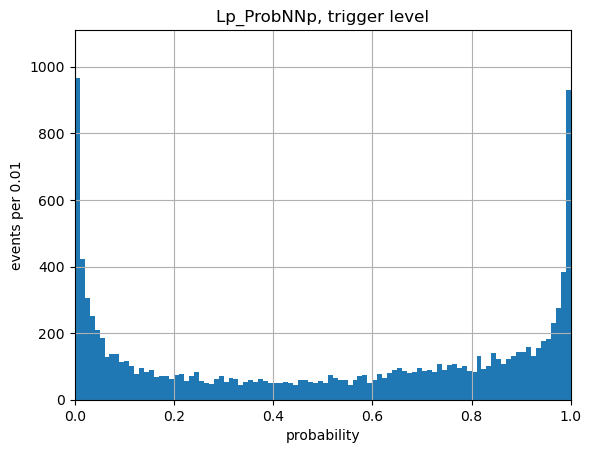

In [23]:

plt.figure()
plt.title("Lp_ProbNNp, trigger level")
nC, bins, patches = plt.hist(Lp_ProbNNp,bins=100,range=(0.,1.))
plt.xlabel("probability")
plt.ylabel("events per 0.01")
plt.axis([0.,1.,0,1.15*max(nC)])
plt.grid(True)
pName = plots_dir+"L0bar_p_KK_Lp_ProbNNp.png"
print("pName = ",pName)
plt.savefig(pName)
plt.show()

pName =  plots/B2L0pbarKpKpL0bar_p_KK_Lp_LL_ProbNNp.png


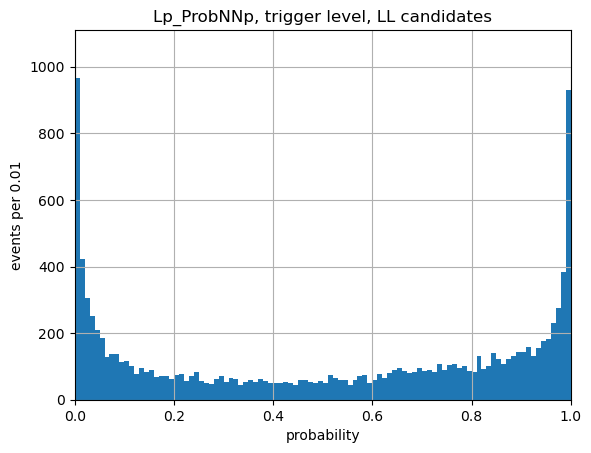

In [24]:
plt.figure()
plt.title('Lp_ProbNNp, trigger level, LL candidates')
nC, bins, patches = plt.hist(Lp_ProbNNp, bins = 100, range = (0.,1.))
plt.xlabel('probability')
plt.ylabel('events per 0.01')
plt.axis([0.,1.,0.,1.15*max(nC)])
plt.grid(True)
pName = plots_dir+"L0bar_p_KK_Lp_LL_ProbNNp.png"
print('pName = ', pName)
plt.savefig(pName)
plt.show()

pName = plots/B2L0pbarKpKpL0bar_p_KK_pp_DD-ProbNNp.png


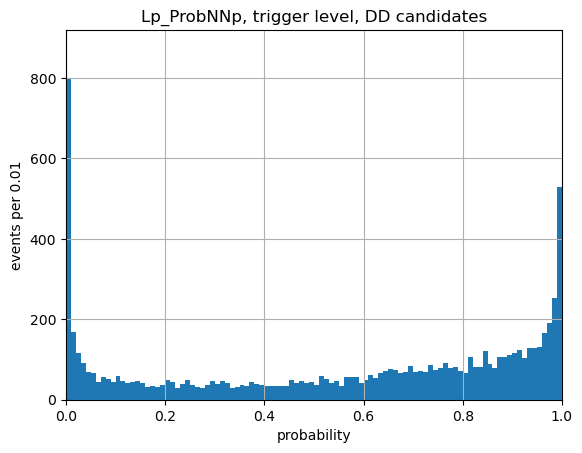

In [25]:
plt.figure()
plt.title('Lp_ProbNNp, trigger level, DD candidates')
nC, bins, patches = plt.hist(Lp_ProbNNp[DD], bins = 100, range =(0.,1.))
plt.xlabel('probability')
plt.ylabel('events per 0.01')
plt.axis([0.,1.,0,1.15*max(nC)])
plt.grid(True)
pName = plots_dir + "L0bar_p_KK_pp_DD-ProbNNp.png"
print('pName =', pName)
plt.savefig(pName)
plt.show()

Events lost by Lp_ProbNNp<0.2 cut: 2118
Events lost by Lp_ProbNNp>0.2 cut: 1762
pName = plots/B2L0pbarKpKpL0bar_p_KK_LambdaLL_Lp_ProbNNp_lt_gt_0p2.png


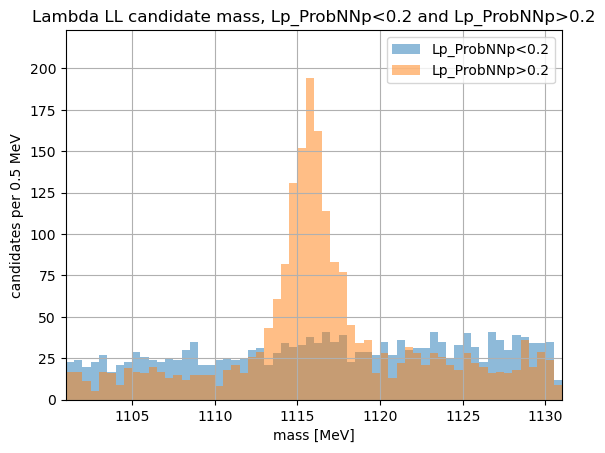

In [26]:
plt.figure()
plt.title('Lambda LL candidate mass, Lp_ProbNNp<0.2 and Lp_ProbNNp>0.2')

# Get the number of events before any cut
total_events = len(L0_MM[LL])

# Plot histogram for Lp_ProbNNp<0.2
nC, bins, patches = plt.hist(L0_MM[(Lp_ProbNNp<0.2) & LL], bins = 60, range = (1101,1131), alpha=0.5, label='Lp_ProbNNp<0.2')

# Calculate the number of events lost after Lp_ProbNNp<0.2 cut
events_after_cut = np.sum((Lp_ProbNNp<0.2) & LL)
print(f"Events lost by Lp_ProbNNp<0.2 cut: {total_events - events_after_cut}")

# Plot histogram for Lp_ProbNNp>0.2
nC2, bins2, patches2 = plt.hist(L0_MM[(Lp_ProbNNp>0.2) & LL], bins = 60, range = (1101,1131), alpha=0.5, label='Lp_ProbNNp>0.2')

# Calculate the number of events lost after Lp_ProbNNp>0.2 cut
events_after_cut2 = np.sum((Lp_ProbNNp>0.2) & LL)
print(f"Events lost by Lp_ProbNNp>0.2 cut: {total_events - events_after_cut2}")

plt.xlabel('mass [MeV]')
plt.ylabel('candidates per 0.5 MeV')
plt.legend(loc='upper right')
plt.axis([1101.,1131.,0,1.15*max(max(nC), max(nC2))])
plt.grid(True)
pName = plots_dir+"L0bar_p_KK_LambdaLL_Lp_ProbNNp_lt_gt_0p2.png"
print("pName =", pName)
plt.savefig(pName)
plt.show()


### Fit the histrogram

In [34]:
# Cuts Cell

## Lets get information from the data about branches we are interested in when defining cuts
Lp_ProbNNk = arrs['Lp_ProbNNk']
Lp_ProbNNpi = arrs['Lp_ProbNNpi']
Lp_ProbNNp = arrs['Lp_ProbNNp']
Lp_ProbNNghost = arrs['Lp_ProbNNghost']
Lpi_ProbNNpi = arrs['Lpi_ProbNNpi']
Lpi_ProbNNk = arrs['Lpi_ProbNNk']
Lpi_ProbNNp = arrs['Lpi_ProbNNp']
Lpi_ProdNNghost = arrs['Lpi_ProbNNghost']

good_L0_MM_LL = L0_MM[(Lp_ProbNNp>0.5) & LL & (L0_MM>1100) & (L0_MM<1165) ]
good_L0_MM_DD = L0_MM[(Lp_ProbNNp>0.5) & DD & (L0_MM>1100) & (L0_MM<1165) ]
good_L0_MM_High_Lp_ProbNNp = L0_MM[(Lp_ProbNNp>0.9) & LL & (L0_MM>1100) & (L0_MM<1165) ]
good_L0_MM_Low_Lp_ProbNNp = L0_MM[(Lp_ProbNNp<0.2) & LL & (L0_MM>1100) & (L0_MM<1165) ] # Acutally this isn't good at all

pName =  plots/B2L0pbarKpKpL0bar_p_KK_LambdaLL_Lp_ProbNNp_gt_0p2.png


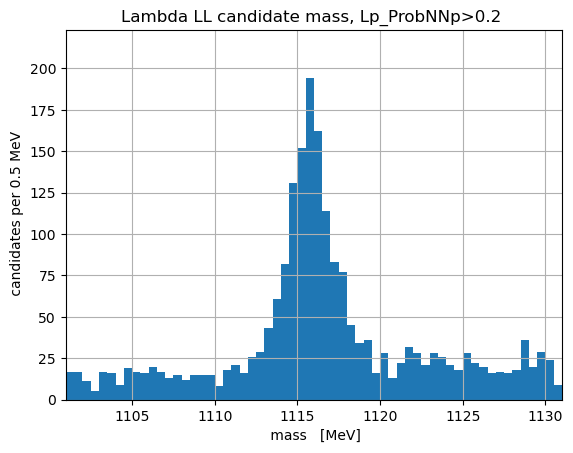

In [167]:
plt.figure()
plt.title("Lambda LL candidate mass, Lp_ProbNNp>0.2 ")
nC, bins, patches =  plt.hist(L0_MM[(Lp_ProbNNp>0.2) & LL], bins=60, range=(1101,1131))
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
pName = plots_dir+"L0bar_p_KK_LambdaLL_Lp_ProbNNp_gt_0p2.png"
print("pName = ",pName)
plt.savefig(pName)
plt.show()

## Lambda Vertices Distributions

pName =  plots/B2L0pbarKpKpL0bar_p_KK_LambdaLL_Lp_ProbNNp_gt_0p2_ENDVERTEX_Z.png


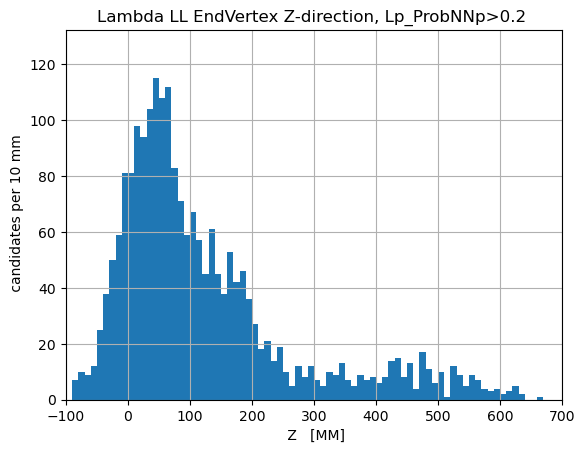

In [ ]:
plt.figure()
plt.title("Lambda LL ENDVERTEX_Z, Lp_ProbNNp>0.2 ")
# better title
plt.title("Lambda LL EndVertex Z-direction, Lp_ProbNNp>0.2 ")
nC, bins, patches =  plt.hist(L0_ENDVERTEX_Z[(Lp_ProbNNp>0.2) & LL], bins=80, range=(-100,700))
plt.xlabel(" Z   [MM]")
plt.ylabel(" candidates per 10 mm")
plt.axis([-100.,700.,0,1.15*max(nC)])
plt.grid(True)
pName = plots_dir+"L0bar_p_KK_LambdaLL_Lp_ProbNNp_gt_0p2_ENDVERTEX_Z.png"
print("pName = ",pName)
plt.savefig(pName)
plt.show()

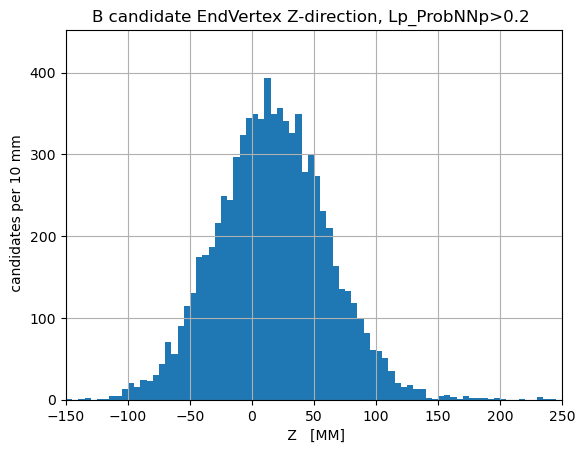

In [ ]:
plt.figure()
plt.title("B candidate EndVertex Z-direction, Lp_ProbNNp>0.2 ")
nC, bins, patches =  plt.hist(Bu_ENDVERTEX_Z[(Lp_ProbNNp>0.2)], bins=80, range=(-150,250))
plt.xlabel(" Z   [MM]")
plt.ylabel(" candidates per 10 mm")
plt.axis([-150.,250.,0,1.15*max(nC)])
plt.grid(True)
plt.show()

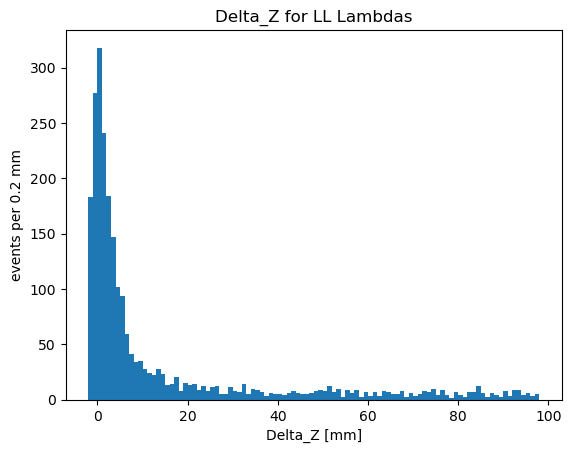

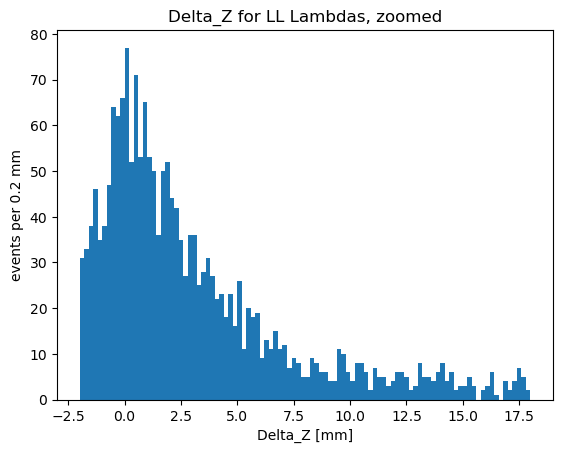

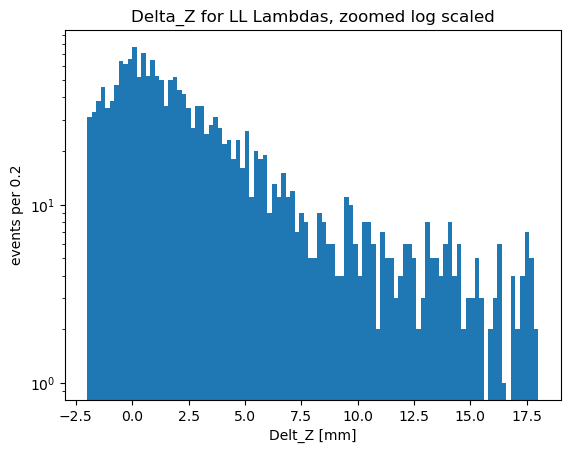

In [ ]:
plt.figure()
plt.title('Delta_Z for LL Lambdas')
plt.hist(Delta_Z[LL], bins = 100, range= (-2., 98.))
plt.xlabel('Delta_Z [mm]')
plt.ylabel('events per 0.2 mm')
plt.show()

plt.figure()
plt.title('Delta_Z for LL Lambdas, zoomed')
plt.hist(Delta_Z[LL], bins = 100, range = (-2.,18.))
plt.xlabel('Delta_Z [mm]')
plt.ylabel('events per 0.2 mm')
plt.show()

plt.figure()
plt.title('Delta_Z for LL Lambdas, zoomed log scaled')
plt.hist(Delta_Z[LL], bins = 100, range = (-2.,18.))
plt.xlabel('Delt_Z [mm]')
plt.ylabel('events per 0.2')
plt.yscale('log')
plt.show()

Lets try to fit `delta_z` plot (without log scale) with an exponential function

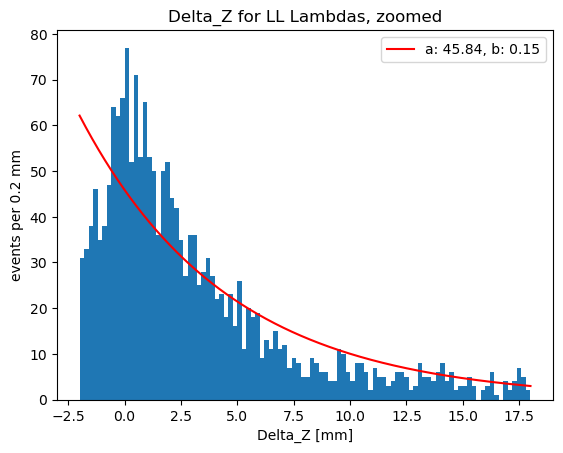

In [ ]:
from scipy.optimize import curve_fit

def exponential_func(x, a, b):
    return a * np.exp(-b * x)

plt.figure()
plt.title('Delta_Z for LL Lambdas, zoomed')
plt.hist(Delta_Z[LL], bins=100, range=(-2., 18.))
plt.xlabel('Delta_Z [mm]')
plt.ylabel('events per 0.2 mm')

# Define the x and y data for the fit
x_data = np.linspace(-2., 18., num=100)
y_data, _ = np.histogram(Delta_Z[LL], bins=100, range=(-2., 18.))

# Perform the fit
popt, pcov = curve_fit(exponential_func, x_data, y_data)

# Generate the fitted curve
x_fit = np.linspace(-2., 18., num=1000)
y_fit = exponential_func(x_fit, *popt)

# Plot the fitted curve
plt.plot(x_fit, y_fit, 'r-', label='Exponential Fit')

# Print the fit parameters as a legend
fit_parameters_text = f"a: {popt[0]:.2f}, b: {popt[1]:.2f}"
plt.legend([fit_parameters_text], loc='best')


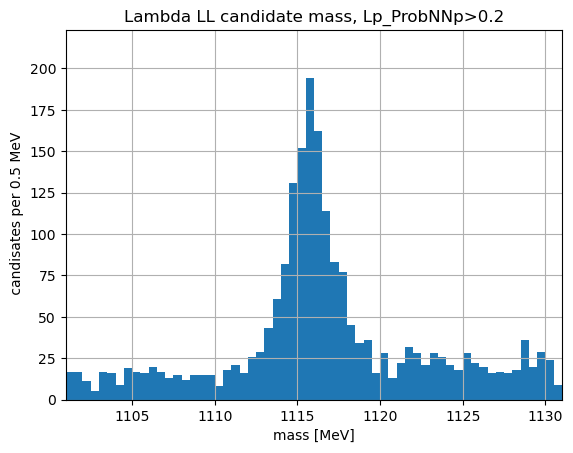

In [ ]:
plt.figure()
plt.title('Lambda LL candidate mass, Lp_ProbNNp>0.2')
nC, bins, patches = plt.hist(L0_MM[(Lp_ProbNNp>0.2) & LL], bins = 60, range= (1101, 1131))
plt.xlabel('mass [MeV]')
plt.ylabel(' candisates per 0.5 MeV')
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
good_Delta_Z = Delta_Z>0.
good_Lambda_chisq_9 = L0_FD_CHISQ>9.
good_Lambda_sep_9 =  good_Delta_Z & good_Lambda_chisq_9 

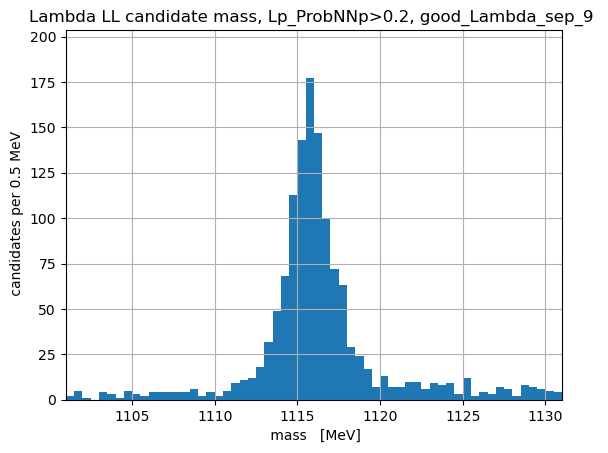

In [ ]:
plt.figure()
plt.title("Lambda LL candidate mass, Lp_ProbNNp>0.2, good_Lambda_sep_9 ")
nC, bins, patches = plt.hist(L0_MM[(Lp_ProbNNp>0.2) & LL & good_Lambda_sep_9], bins=60, range=(1101,1131))
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
plt.show()

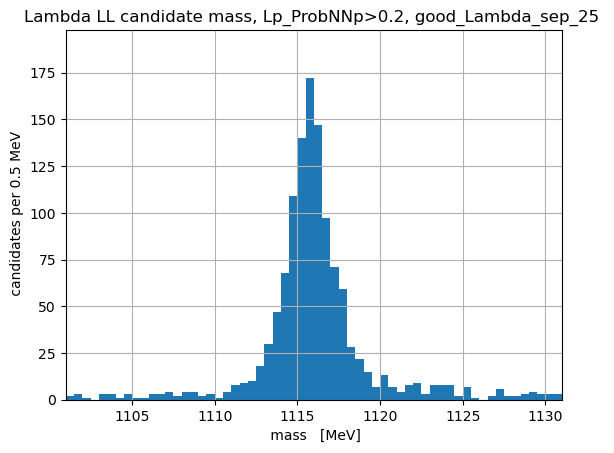

In [43]:
good_Delta_Z = Delta_Z>0.
good_Lambda_chisq_25  = L0_FD_CHISQ>25.
good_Lambda_sep_25 =  good_Delta_Z & good_Lambda_chisq_25

plt.figure()
plt.title("Lambda LL candidate mass, Lp_ProbNNp>0.2, good_Lambda_sep_25 ")
nC, bins, patches = plt.hist(L0_MM[(Lp_ProbNNp>0.2) & LL & good_Lambda_sep_25], bins=60, range=(1101,1131))
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
plt.show()

pName =  plots/B2L0pbarKpKpL0bar_p_KK_LambdaDD_Lp_ProbNNp_gt_0p2_sep100.png


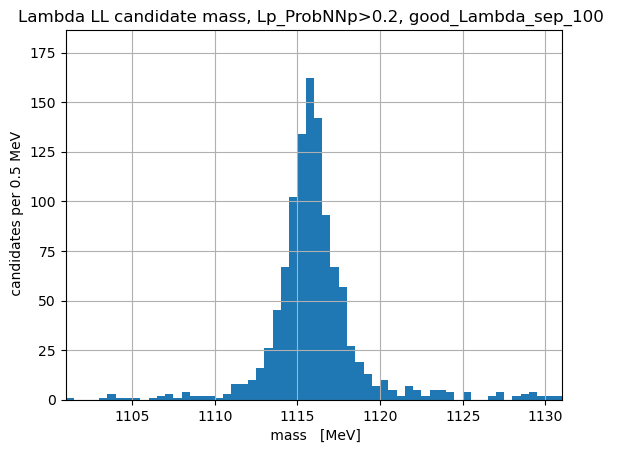

In [44]:
good_Delta_Z = Delta_Z>0.
good_Lambda_chisq_100  = L0_FD_CHISQ>100.
good_Lambda_sep_100 =  good_Delta_Z & good_Lambda_chisq_100

plt.figure()
plt.title("Lambda LL candidate mass, Lp_ProbNNp>0.2, good_Lambda_sep_100 ")
nC, bins, patches = plt.hist(L0_MM[(Lp_ProbNNp>0.2) & LL & good_Lambda_sep_100], bins=60, range=(1101,1131))
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
pName = plots_dir+"L0bar_p_KK_LambdaDD_Lp_ProbNNp_gt_0p2_sep100.png"
print("pName = ",pName)
plt.savefig(pName)
plt.show()

lets try to do a fit here. We start with a simple example trying to fit a random generated gaussian distribution

In [38]:
from iminuit import Minuit
from probfit import UnbinnedLH, BinnedLH, gaussian

data = np.random.randn(10000)
unbinned_likelihood = UnbinnedLH(gaussian, data)
binned_likelihood = BinnedLH(gaussian, data)

minuit = Minuit(unbinned_likelihood, mean=0.1, sigma=1.1)
#minuit = Minuit(binned_likelihood, mean=0.1, sigma=1.1)
minuit.migrad()



┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 1.431e+04                  │         Nfcn = 34 (34 total)         │
│ EDM = 2.23e-06 (Goal: 0.0001)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mean  │   0.005   │   0.010   │            │            │         │         │       │
│ 1 │ sigma │   1.013   │   0.007   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

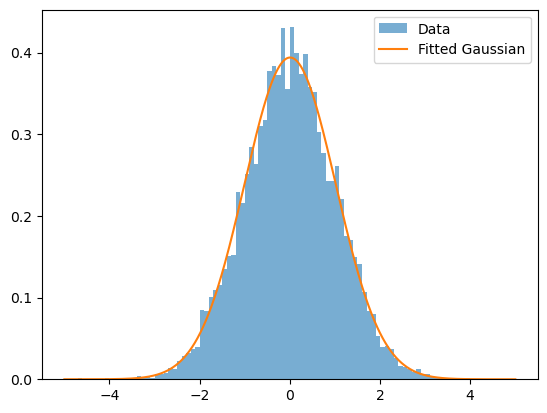

In [39]:
plt.figure()
plt.hist(data, bins=100, range=(-5, 5), density=True, alpha=0.6, label="Data")

x = np.linspace(-5, 5, 1000)
#y = [gaussian(xi, minuit.values['mean'], minuit.values['sigma']) for xi in x] 
y = [gaussian(xi, *minuit.values.values()) for xi in x] # this works too as the ordering is not important
plt.plot(x, y, label="Fitted Gaussian")
plt.legend()
plt.show()


lets now try to combine a gaussian + linear fit using `AddPdf` method in `probfit` packages

In [40]:
from iminuit import Minuit
from probfit import UnbinnedLH, gaussian, linear, BinnedLH
import numpy as np

def combined_model(x, mean, sigma, m, c, fraction):
    return fraction * gaussian(x, mean, sigma) + (1 - fraction) * linear(x, m, c)

# Create some data
np.random.seed(0)
signal = np.random.randn(7000)
print(signal)
background = np.random.uniform(-5, 5, size=3000)
print(background)
data = np.concatenate([signal, background])

# Define the Unbinned Likelihood
unbinned_likelihood = BinnedLH(combined_model, data)

# Create the Minuit object and give it the initial parameter guesses
minuit = Minuit(unbinned_likelihood, mean=0, sigma=1, m=0, c=0, fraction=0.7)

# Perform the fit
minuit.migrad()


[ 1.76405235  0.40015721  0.97873798 ... -1.00458367 -1.03253236
 -0.90107179]
[ 2.82277164 -3.47820685 -0.59610358 ... -0.85279928 -4.89411975
 -3.00782012]


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 6663                       │         Nfcn = 85 (85 total)         │
│ EDM = nan (Goal: 0.0001)         │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │APPROXIMATE│NOT pos. def.│   FORCED   │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mean     │     0     │    nan    │            │            │         │         │       │
│ 1 │ sigma    │     1     │    nan    │            │            │         │         │       │
│ 2 │ m        │     0     │    nan    │            │            │         │         │       │
│ 3 │ c        │     0     │    nan    │            │            │         │         │       │
│ 4 │ fraction │   7e-1    │    nan    │            │            │         │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

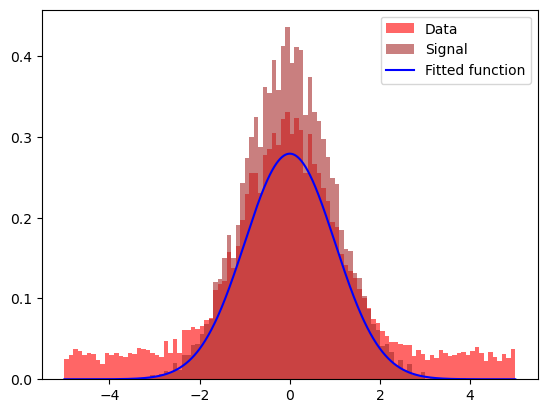

In [41]:
fit_result = minuit.migrad()
fitted_params = minuit.values

# Create x values for the fitted function
x = np.linspace(-5, 5, 1000)

# Calculate y values using the fitted parameters
y = [combined_model(xi, fitted_params['mean'], fitted_params['sigma'], fitted_params['m'], fitted_params['c'], fitted_params['fraction']) for xi in x]

# Plot the histogram of data
plt.hist(data, bins=100, range=(-5, 5), density=True, alpha=0.6, label="Data", color='red')

#plot the signal data
plt.hist(signal, bins=100, range=(-5, 5), density=True, alpha=0.6, label="Signal", color='brown')
# Plot the fitted function
plt.plot(x, y, label="Fitted function", color='blue')

plt.legend()
plt.show()

Now lets go back and fit the mass distribution of Lambda

In [240]:
import numpy as np
from probfit import BinnedLH, gaussian, linear, AddPdfNorm, Extended, UnbinnedLH, BinnedChi2
from iminuit import Minuit

# your existing code
data = np.array(L0_MM[(Lp_ProbNNp>0.3) & LL & good_Lambda_sep_100])
range_hist = (1000, 1160)
bins_hist = 160

# definitions of the gaussian and linear distributions
# the Extended function allows the normalization parameter to be fitted
gaussian_extended = Extended(gaussian, extname='N_gauss')
linear_extended = Extended(linear, extname='N_linear')

# combined function using probfit's AddPdf
combined_pdf = AddPdfNorm(gaussian_extended, linear_extended)

# create binned likelihood function using your defined combined function
binned_likelihood = BinnedLH(combined_pdf, data, bins=bins_hist, bound=range_hist)
#unbinned_likelihood = UnbinnedLH(combined_pdf, data)
#binned_chi2 = BinnedChi2(combined_pdf, data, bins=bins_hist, bound=range_hist)
# init parameters
init_pars = [data.sum()*0.90, 1115, 15, data.sum()*0.1, -1, 450.]
# The order of init parameters are [N_gauss, mean, sigma, N_linear, m, c]
# create Minuit instance
minimizer_bp = Minuit(binned_likelihood, N_gauss=init_pars[0], mean=init_pars[1], sigma=init_pars[2], N_linear=init_pars[3], m=init_pars[4], c=init_pars[5],
                      limit_N_gauss=(0, np.inf), limit_mean=(1100, 1165), limit_sigma=(-100, 100.), limit_N_linear=(0, np.inf), limit_m=(-100, 100), limit_c=(-np.inf, np.inf))

# perform the fit
minimizer_bp.migrad()


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = nan                        │        Nfcn = 186 (186 total)        │
│ EDM = nan (Goal: 0.0001)         │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │APPROXIMATE│NOT pos. def.│   FORCED   │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mean     │  1.115e3  │    nan    │            │            │  1100   │  1165   │       │
│ 1 │ sigma    │   1.5e1   │    nan    │            │            │  -100   │   100   │       │
│ 2 │ N_gauss  │ 1.0597e6  │    nan    │            │            │    0    │         │       │
│ 3 │ m        │    -1     │    nan    │            │            │  -100   │   100   │       │
│ 4 │ c        │   4.5e2   │    nan    │            │            │         │         │       │
│ 5 │ N_linear │ 1.1774e5  │    nan    │            │            │    0    │         │       │
│ 6 │ f_0      │     0     │    nan    │            │            │         │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [236]:
y_bp, edges = np.histogram(L0_MM[(Lp_ProbNNp>0.3) & LL & good_Lambda_sep_100], range=(1000, 1160), bins=160)
y_bp = np.array(y_bp)
edges = np.array(edges)

print('y_bp shape: ', y_bp.shape)
print('edges shape: ', edges.shape)

x = 0.5*(edges[:-1] + edges[1:])
widths = edges[1:] - edges[:-1]
err_bp = np.sqrt(y_bp)
print('x shape: ', x.shape)
print('widths shape: ', widths.shape)
print('err_bp shape: ', err_bp.shape)

def gaussian(x, mu, sigma, norm):
    return norm * np.exp(-(x - mu)**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)

def linear(x, a, b):
    return a * x + b

def combined_function(x, n_s, n_b, mu, sigma, a, b):
    return n_s * gaussian(x, mu, sigma, 1) + n_b * linear(x, a, b)

def chi2(n_s, n_b, mu, sigma, a, b):
    mask = err_bp != 0
    ressq = (y_bp[mask] - combined_function(x[mask], n_s, n_b, mu, sigma, a, b))**2 / err_bp[mask]**2
    return ressq.sum()

init_pars = [y_bp.sum()*0.95, y_bp.sum()*0.05, 1115, 15, -1., -1.]
minimizer_bp = Minuit(chi2, n_s=init_pars[0], n_b=init_pars[1], mu=init_pars[2], sigma=init_pars[3], a=init_pars[4], b = init_pars[5],
                      limit_n_s=(0, np.inf), limit_n_b=(0, np.inf), limit_mu=(1100, 1165), limit_sigma=(1., 100.), limit_a=(-np.inf, np.inf), limit_b=(-np.inf, np.inf))

minimizer_bp.migrad()


y_bp shape:  (160,)
edges shape:  (161,)
x shape:  (160,)
widths shape:  (160,)
err_bp shape:  (160,)


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 952.6                      │       Nfcn = 1172 (1172 total)       │
│ EDM = 4.91e-05 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│INVALID Minimum│ Valid Parameters │       SOME Parameters at limit       │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│ Hesse FAILED  │  Has Covariance  │APPROXIMATE│NOT pos. def.│ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ n_s   │ 2.8759e6  │ 0.0000e6  │            │            │    0    │         │       │
│ 1 │ n_b   │ 2.1405e-3 │ 0.0000e-3 │            │            │    0    │         │       │
│ 2 │ mu    │ 1.1647e3  │ 0.0000e3  │            │            │  1100   │  1165   │       │
│ 3 │ sigma │   1.131   │   0.000   │            │            │    1    │   100   │       │
│ 4 │ a     │ 7.8804e-1 │ 0.0000e-1 │            │            │         │         │       │
│ 5 │ b     │  7.154e2  │  0.000e2  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

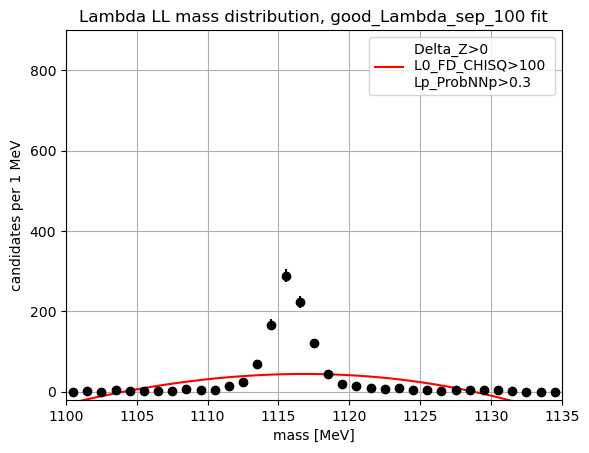

In [234]:
# Clear the current figure
plt.clf()

# Create a new axis
ax = plt.gca()

# Plot the data points with error bars
ax.errorbar(x, y_bp, yerr=err_bp, fmt="o", label="Data", color='black')

# Generate x values for the fit
x_fit = np.linspace(1100, 1165, 100)

# Extract the minimizer values
minimizer_values = [float(val) for val in minimizer_bp.values.values()]

# Calculate the y values for the signal, background, and combined fit
y_fit_signal = np.array([gaussian(xi, *minimizer_values[2:5]) for xi in x_fit])
y_fit_background = np.array([linear(xi, *minimizer_values[4:]) for xi in x_fit])
y_fit_combined = np.array([combined_function(xi, *minimizer_values) for xi in x_fit])

# Plot the fitted combined function
ax.plot(x_fit, y_fit_combined, label="Fitted Combined", color='red')

# Set the title, labels, and axis limits
ax.set_title('Lambda LL mass distribution, good_Lambda_sep_100 fit')
ax.set_ylabel('candidates per 1 MeV')
ax.set_xlabel('mass [MeV]')
ax.set_xlim(1100, 1135)
ax.set_ylim(-20, 900)

# Add the legend and grid
ax.legend(['Delta_Z>0 \nL0_FD_CHISQ>100 \nLp_ProbNNp>0.3'], loc='best')
ax.grid(True)

# Display the plot
plt.show()


Here we do a grid search to look for a set of parameters that will give us less than order of magnitude difference between `np.sqrt(n_s)` and `n_s_error`

In [117]:
from itertools import product

# Define the parameter grid
mu_values = [1110, 1115, 1120]
sigma_values = [10, 11.5, 13]
a_values = [350, 400, 450]

param_grid = list(product(mu_values, sigma_values, a_values))

valid_params = []

# Loop through different values for n_s
for n_s_frac in np.linspace(0.1, 0.9, 9):
    n_b_frac = 1.0 - n_s_frac
    
    # Loop through the parameter grid
    for mu, sigma, a in param_grid:
        init_pars = [y_bp.sum() * n_s_frac, y_bp.sum() * n_b_frac, mu, sigma, a]
        
        minimizer_bp = Minuit(chi2, n_s=init_pars[0], n_b=init_pars[1], mu=init_pars[2], sigma=init_pars[3], a=init_pars[4],
                              limit_n_s=(0, np.inf), limit_n_b=(0, np.inf), limit_mu=(1100, 1165), limit_sigma=(1., 100.), limit_a=(1., np.inf),
                              errordef=1)

        minimizer_bp.migrad()
        
        n_s = minimizer_bp.values['n_s']
        n_b = minimizer_bp.values['n_b']
        
        # Check if the number of signal events is greater than the number of background events
        if n_s > n_b:
            n_s_error = minimizer_bp.errors['n_s']
            diff_orders_of_magnitude = np.abs(np.log10(n_s_error) - np.log10(np.sqrt(n_s)))
            
            # Append the parameter set if the difference is smaller than 1
            if diff_orders_of_magnitude < 1:
                valid_params.append((n_s_frac, n_b_frac, mu, sigma, a, diff_orders_of_magnitude))

# Save the valid parameter sets to a file
with open("lambda_fit_parameters_good_Lambda_sep_100.txt", "w") as f:
    for params in valid_params:
        print(f"Valid parameters: {params[:-1]}, diff_orders_of_magnitude: {params[-1]}", file=f)


pName =  plots/B2L0pbarKpKpL0bar_p_KK_LambdaDD_Lp_ProbNNp_gt_0p2_sep100.png


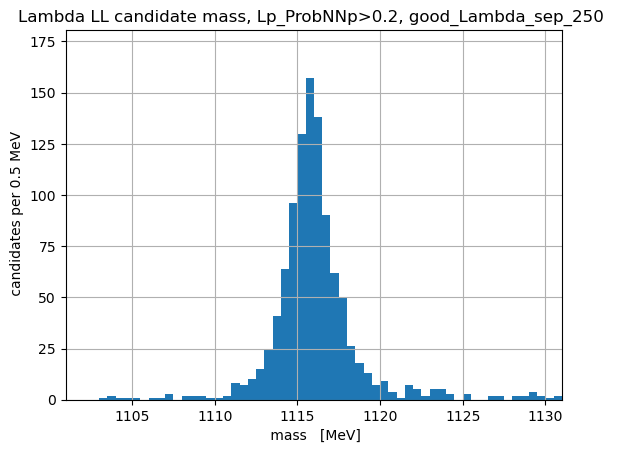

In [47]:
good_Delta_Z = Delta_Z>0.
good_Lambda_chisq_250  = L0_FD_CHISQ>250.
good_Lambda_sep_250 =  good_Delta_Z & good_Lambda_chisq_250

plt.figure()
plt.title("Lambda LL candidate mass, Lp_ProbNNp>0.2, good_Lambda_sep_250 ")
nC, bins, patches = plt.hist(L0_MM[(Lp_ProbNNp>0.2) & LL & good_Lambda_sep_250], bins=60, range=(1101,1131))
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
pName = plots_dir+"L0bar_p_KK_LambdaDD_Lp_ProbNNp_gt_0p2_sep100.png"
print("pName = ",pName)
plt.savefig(pName)
plt.show()

In [66]:
y_bp, edges = np.histogram(L0_MM[(Lp_ProbNNp>0.3) & LL & good_Lambda_sep_250], range=(1000, 1160), bins=60)
y_bp = np.array(y_bp)
edges = np.array(edges)

x = 0.5*(edges[:-1] + edges[1:])
widths = edges[1:] - edges[:-1]
err_bp = np.sqrt(y_bp)

def gaussian(x, mu, sigma, norm):
    return norm * np.exp(-(x - mu)**2 / (2 * sigma**2))

def linear(x, a):
    return a * x 

def combined_function(x, n_s, n_b, mu, sigma, a):
    return n_s * gaussian(x, mu, sigma, 1) + n_b * linear(x, a)

def chi2(n_s, n_b, mu, sigma, a,):
    mask = err_bp != 0
    ressq = (y_bp[mask] - combined_function(x[mask], n_s, n_b, mu, sigma, a))**2 / err_bp[mask]**2
    return ressq.sum()

init_pars = [y_bp.sum()*0.8, y_bp.sum()*0.2, 1120, 10, 450.]
minimizer_bp = Minuit(chi2, n_s=init_pars[0], n_b=init_pars[1], mu=init_pars[2], sigma=init_pars[3], a=init_pars[4],
                      limit_n_s=(0, np.inf), limit_n_b=(0, np.inf), limit_mu=(1100, 1165), limit_sigma=(1., 100.), limit_a=(1., np.inf))

minimizer_bp.migrad()


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 919                        │        Nfcn = 579 (579 total)        │
│ EDM = 0.00014 (Goal: 0.0002)     │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │       SOME Parameters at limit       │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │APPROXIMATE│NOT pos. def.│   FORCED   │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ n_s   │     0     │    24     │            │            │    0    │         │       │
│ 1 │ n_b   │  5.61e-3  │  0.13e-3  │            │            │    0    │         │       │
│ 2 │ mu    │  1.10e3   │  0.04e3   │            │            │  1100   │  1165   │       │
│ 3 │ sigma │     0     │    90     │            │            │    1    │   100   │       │
│ 4 │ a     │   1.011   │   0.023   │            │            │    1    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

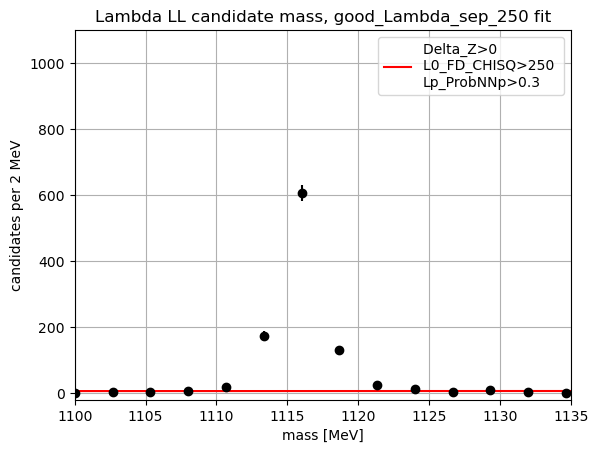

In [67]:

plt.clf()
ax = plt.gca()
ax.errorbar(x, y_bp, yerr=err_bp, fmt="o", label="Data", color='black')

x_fit = np.linspace(1000, 1165, 1000)
minimizer_values = [float(val) for val in minimizer_bp.values.values()]
y_fit_signal = np.array([gaussian(xi, *minimizer_values[2:5]) for xi in x_fit])
y_fit_background = np.array([linear(xi, *minimizer_values[4:]) for xi in x_fit])
y_fit_combined = np.array([combined_function(xi, *minimizer_values) for xi in x_fit])

# Remember, we need to multiply by the bin width to turn the PDF value into a yield.
ax.plot(x_fit, y_fit_combined, label="Fitted Combined", color='red')
ax.title.set_text('Lambda LL candidate mass, good_Lambda_sep_250 fit')
ax.yaxis.set_label_text('candidates per 2 MeV')
ax.xaxis.set_label_text('mass [MeV]')
ax.set_xlim(1100, 1135)
ax.set_ylim(-20,1100)
ax.legend(['Delta_Z>0 \nL0_FD_CHISQ>250 \nLp_ProbNNp>0.3'], loc='best')
ax.grid(True)
plt.show()



In [201]:
from itertools import product

# Define the parameter grid
mu_values = [1110, 1115, 1120]
sigma_values = [10, 11.5, 13]
a_values = [350, 400, 450]

param_grid = list(product(mu_values, sigma_values, a_values))

valid_params = []

# Loop through different values for n_s
for n_s_frac in np.linspace(0.1, 0.9, 9):
    n_b_frac = 1.0 - n_s_frac
    
    # Loop through the parameter grid
    for mu, sigma, a in param_grid:
        init_pars = [y_bp.sum() * n_s_frac, y_bp.sum() * n_b_frac, mu, sigma, a]
        
        minimizer_bp = Minuit(chi2, n_s=init_pars[0], n_b=init_pars[1], mu=init_pars[2], sigma=init_pars[3], a=init_pars[4],
                              limit_n_s=(0, np.inf), limit_n_b=(0, np.inf), limit_mu=(1100, 1165), limit_sigma=(1., 100.), limit_a=(1., np.inf),
                              errordef=1)

        minimizer_bp.migrad()
        
        n_s = minimizer_bp.values['n_s']
        n_b = minimizer_bp.values['n_b']
        
        # Check if the number of signal events is greater than the number of background events
        if n_s > n_b:
            n_s_error = minimizer_bp.errors['n_s']
            diff_orders_of_magnitude = np.abs(np.log10(n_s_error) - np.log10(np.sqrt(n_s)))
            
            # Append the parameter set if the difference is smaller than 1
            if diff_orders_of_magnitude < 1:
                valid_params.append((n_s_frac, n_b_frac, mu, sigma, a, diff_orders_of_magnitude))

# Save the valid parameter sets to a file
with open("lambda_fit_parameters_good_Lambda_sep_250.txt", "w") as f:
    for params in valid_params:
        print(f"Valid parameters: {params[:-1]}, diff_orders_of_magnitude: {params[-1]}", file=f)


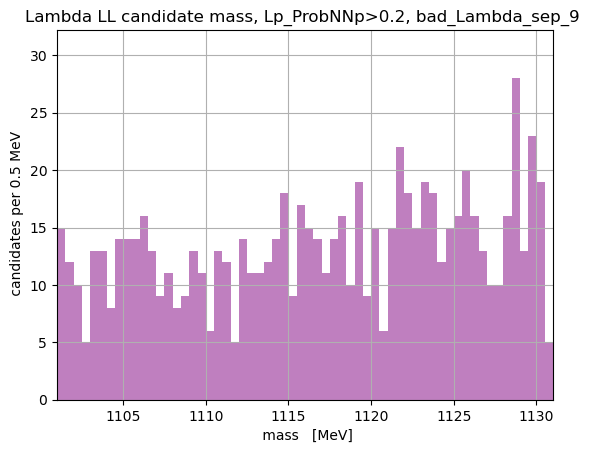

In [83]:
bad_Delta_Z = Delta_Z<0.
bad_Lambda_chisq_9  = L0_FD_CHISQ<9.
bad_Lambda_sep_9 =  bad_Delta_Z | bad_Lambda_chisq_9

plt.figure()
plt.title("Lambda LL candidate mass, Lp_ProbNNp>0.2, bad_Lambda_sep_9 ")
nC, bins, patches =  plt.hist(L0_MM[(Lp_ProbNNp>0.2) & LL & bad_Lambda_sep_9], bins=60, range=(1101,1131), color='purple', alpha= 0.50)
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
plt.show()

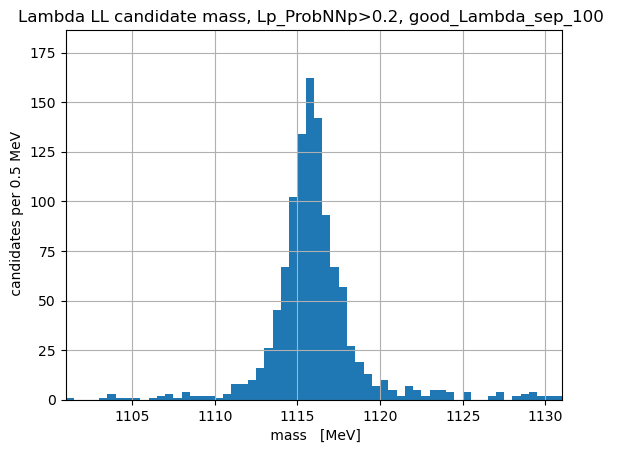

In [84]:
good_Delta_Z = Delta_Z>0.
good_Lambda_chisq_100  = L0_FD_CHISQ>100.
good_Lambda_sep_100 =  good_Delta_Z & good_Lambda_chisq_100

plt.figure()
plt.title("Lambda LL candidate mass, Lp_ProbNNp>0.2, good_Lambda_sep_100 ")
nC, bins, patches = plt.hist(L0_MM[(Lp_ProbNNp>0.2) & LL & good_Lambda_sep_100], bins=60, range=(1101,1131))
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
##pName = plots_dir+"L0bar_p_KK_LambdaDD_Lp_ProbNNp_gt_0p2_sep100.png"
##print("pName = ",pName)
##plt.savefig(pName)
plt.show()

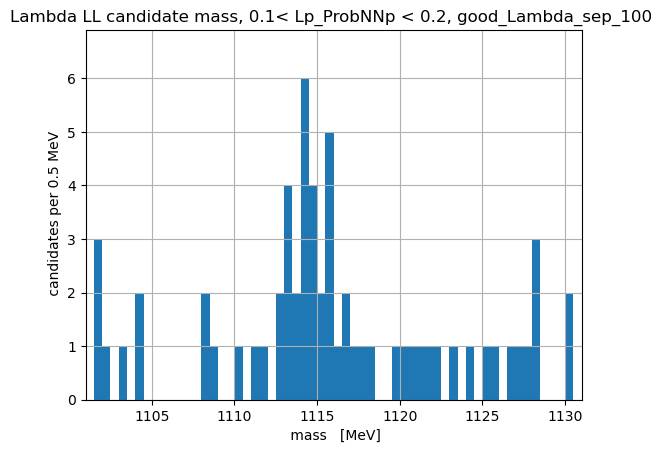

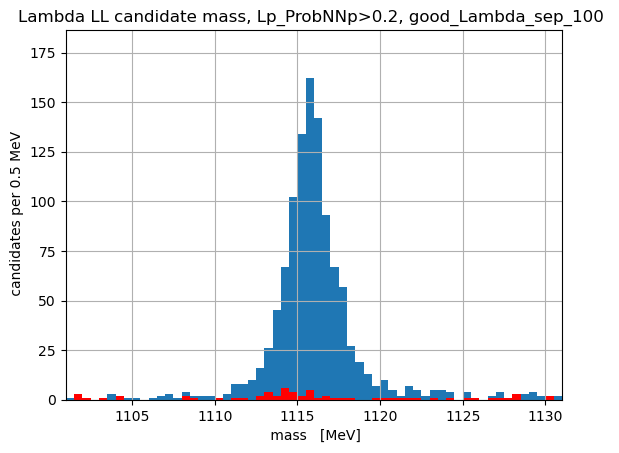

In [85]:
ProbNNp_0p1_0p2 = (Lp_ProbNNp>0.1) & (Lp_ProbNNp<0.2)

plt.figure()
plt.title("Lambda LL candidate mass, 0.1< Lp_ProbNNp < 0.2, good_Lambda_sep_100 ")
nC, bins, patches = plt.hist(L0_MM[(ProbNNp_0p1_0p2) & LL & good_Lambda_sep_100], bins=60, range=(1101,1131))
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
##pName = plots_dir+"L0bar_p_KK_LambdaDD_Lp_ProbNNp_gt_0p2_sep100.png"
##print("pName = ",pName)
##plt.savefig(pName)
plt.show()

plt.figure()
plt.title("Lambda LL candidate mass, Lp_ProbNNp>0.2, good_Lambda_sep_100 ")
nC, bins, patches = plt.hist(L0_MM[(Lp_ProbNNp>0.2) & LL & good_Lambda_sep_100], bins=60, range=(1101,1131))
nC_0p1_0p2, bins, patches = plt.hist(L0_MM[(ProbNNp_0p1_0p2) & LL & good_Lambda_sep_100], bins=60, range=(1101,1131),color='r')
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
##pName = plots_dir+"L0bar_p_KK_LambdaDD_Lp_ProbNNp_gt_0p2_sep100.png"
##print("pName = ",pName)
##plt.savefig(pName)
plt.show()

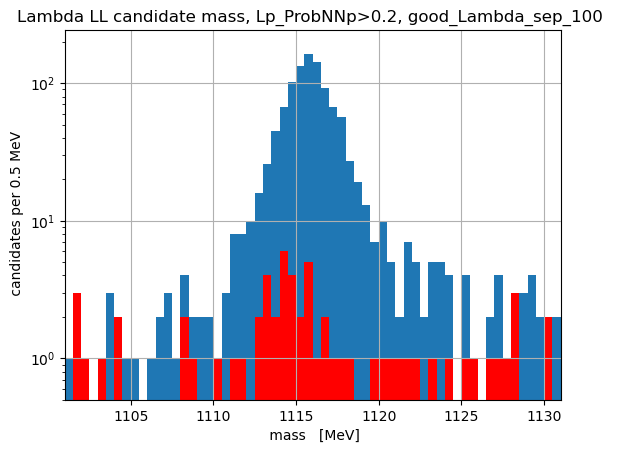

In [86]:
plt.figure()
plt.title("Lambda LL candidate mass, Lp_ProbNNp>0.2, good_Lambda_sep_100 ")
nC, bins, patches = plt.hist(L0_MM[(Lp_ProbNNp>0.2) & LL & good_Lambda_sep_100], bins=60, range=(1101,1131))
nC_0p1_0p2, bins, patches = plt.hist(L0_MM[(ProbNNp_0p1_0p2) & LL & good_Lambda_sep_100], bins=60, range=(1101,1131),color='r')
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.yscale('log')
plt.axis([1101.,1131.,0.5,1.5*max(nC)])
plt.grid(True)
##pName = plots_dir+"L0bar_p_KK_LambdaDD_Lp_ProbNNp_gt_0p2_sep100.png"
##print("pName = ",pName)
##plt.savefig(pName)
plt.show()

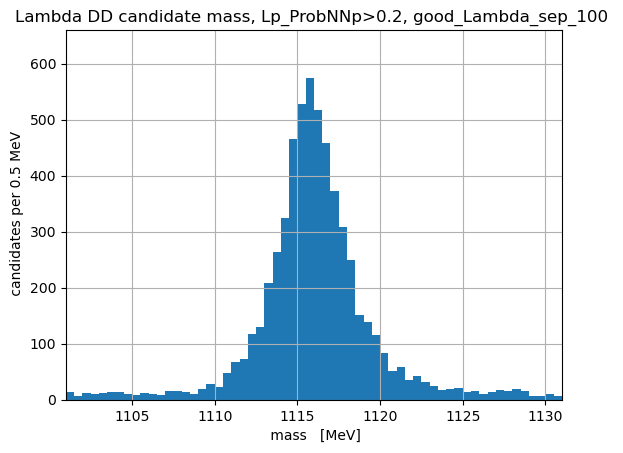

In [87]:
plt.figure()
plt.title("Lambda DD candidate mass, Lp_ProbNNp>0.2, good_Lambda_sep_100 ")
nC, bins, patches = plt.hist(L0_MM[(Lp_ProbNNp>0.2) & DD], bins=60, range=(1101,1131))
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
##pName = plots_dir+"L0bar_p_KK_LambdaDD_Lp_ProbNNp_gt_0p2_sep100.png"
##print("pName = ",pName)
##plt.savefig(pName)
plt.show()


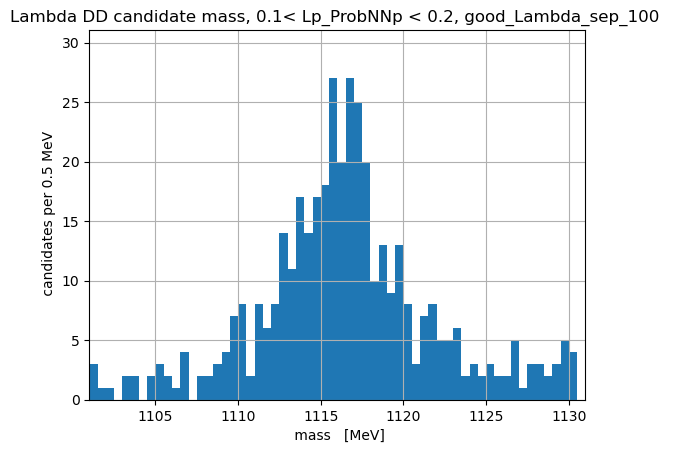

In [88]:
ProbNNp_0p1_0p2 = (Lp_ProbNNp>0.1) & (Lp_ProbNNp<0.2)

plt.figure()
plt.title("Lambda DD candidate mass, 0.1< Lp_ProbNNp < 0.2, good_Lambda_sep_100 ")
nC, bins, patches = plt.hist(L0_MM[(ProbNNp_0p1_0p2) & DD], bins=60, range=(1101,1131))
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
##pName = plots_dir+"L0bar_p_KK_LambdaDD_Lp_ProbNNp_gt_0p2_sep100.png"
##print("pName = ",pName)
##plt.savefig(pName)
plt.show()

In [ ]:
plt.figure()
plt.title("Lambda DD candidate mass, Lp_ProbNNp>0.2, good_Lambda_sep_100 ")
nC, bins, patches = plt.hist(L0_MM[(Lp_ProbNNp>0.2) & DD], bins=60, range=(1101,1131))
nC_0p1_0p2, bins, patches = plt.hist(L0_MM[(ProbNNp_0p1_0p2) & DD], bins=60, range=(1101,1131),color='r')
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
##pName = plots_dir+"L0bar_p_KK_LambdaDD_Lp_ProbNNp_gt_0p2_sep100.png"
##print("pName = ",pName)
##plt.savefig(pName)
plt.show()

In [ ]:
plt.figure()
plt.title("Lambda DD candidate mass, Lp_ProbNNp>0.2, good_Lambda_sep_100 ")
nC, bins, patches = plt.hist(L0_MM[(Lp_ProbNNp>0.2) & DD], bins=60, range=(1101,1131))
nC_0p1_0p2, bins, patches = plt.hist(L0_MM[(ProbNNp_0p1_0p2) & DD], bins=60, range=(1101,1131),color='r')
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.yscale('log')
plt.axis([1101.,1131.,0.5,1.5*max(nC)])
plt.grid(True)
##pName = plots_dir+"L0bar_p_KK_LambdaDD_Lp_ProbNNp_gt_0p2_sep100.png"
##print("pName = ",pName)
##plt.savefig(pName)
plt.show()

In [ ]:
plt.figure()
plt.title("Lambda LL ENDVERTEX_Z, Lp_ProbNNp>0.2, Lambda_sep_100 ")
nC, bins, patches =  plt.hist(L0_ENDVERTEX_Z[(Lp_ProbNNp>0.2) & LL & good_Lambda_sep_100], bins=80, range=(-100,700))
plt.xlabel(" Z   [MM]")
plt.ylabel(" candidates per 10 mm")
plt.axis([-100.,650.,0,1.15*max(nC)])
plt.grid(True)
pName = plots_dir+"L0bar_p_KK_LambdaLL_Lp_ProbNNp_gt_0p2_ENDVERTEX_Z_Lambda_sep100.png"
print("pName = ",pName)
plt.savefig(pName)
plt.show()

plt.figure()
plt.title("Lambda LL ENDVERTEX_Z, Lp_ProbNNp>0.1, Lambda_sep_100 ")
nC, bins, patches =  plt.hist(L0_ENDVERTEX_Z[(Lp_ProbNNp>0.1) & LL & good_Lambda_sep_100], bins=80, range=(-100,700))
plt.xlabel(" Z   [MM]")
plt.ylabel(" candidates per 10 mm")
plt.axis([-100.,650.,0,1.15*max(nC)])
plt.grid(True)
pName = plots_dir+"L0bar_p_KK_LambdaLL_Lp_ProbNNp_gt_0p2_ENDVERTEX_Z_Lambda_sep100.png"
print("pName = ",pName)
plt.savefig(pName)
plt.show()

In [ ]:
plt.figure()
plt.title("Lambda DD candidate mass, Lp_ProbNNp<0.2 ")
nC, bins, patches = plt.hist(L0_MM[(Lp_ProbNNp<0.2) & DD], bins=60, range=(1101,1131), color='purple')
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
pName = plots_dir+"L0bar_p_KK_LambdaDD_Lp_ProbNNp_lt_0p2.png"
print("pName = ",pName)
plt.savefig(pName)
plt.show()

plt.figure()
plt.title("Lambda DD candidate mass, Lp_ProbNNp>0.2 ")
nC, bins, patches = plt.hist(L0_MM[(Lp_ProbNNp>0.2) & DD], bins=60, range=(1101,1131), color='purple')
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
pName = plots_dir+"L0bar_p_KK_LambdaDD_Lp_ProbNNp_gt_0p2.png"
print("pName = ",pName)
plt.savefig(pName)
plt.show()

In [ ]:
plt.figure()
plt.title("Lambda DD ENDVERTEX_Z, Lp_ProbNNp>0.2")
nC, bins, patches =  plt.hist(L0_ENDVERTEX_Z[(Lp_ProbNNp>0.2) & DD], bins=220, range=(600,2800))
plt.xlabel(" Z   [MM]")
plt.ylabel(" candidates per 10 mm")
plt.axis([600.,2800.,0,1.15*max(nC)])
plt.grid(True)
pName = plots_dir+"L0bar_p_KK_LambdaDD_Lp_ProbNNp_gt_0p2_ENDVERTEX_Z.png"
print("pName = ",pName)
plt.savefig(pName)
plt.show()


In [ ]:
plt.figure()
plt.title("Lambda DD ENDVERTEX_Z, Lp_ProbNNp>0.2")
nC, bins, patches =  plt.hist(L0_ENDVERTEX_Z[(Lp_ProbNNp>0.2) & DD], bins=75, range=(2200,2500))
plt.xlabel(" Z   [MM]")
plt.ylabel(" candidates per 4 mm")
plt.axis([2200.,2500.,0,1.15*max(nC)])
plt.grid(True)
pName = plots_dir+"L0bar_p_KK_LambdaDD_Lp_ProbNNp_gt_0p2_ENDVERTEX_Z_zoom2300.png"
print("pName = ",pName)
plt.savefig(pName)
plt.show()

In [ ]:
plt.figure()
plt.title("Lambda DD candidate mass, Lp_ProbNNp>0.2, 2330<Z<2380 ")
nC, bins, patches = plt.hist(L0_MM[(Lp_ProbNNp>0.2) & DD & (L0_ENDVERTEX_Z>2330) & (L0_ENDVERTEX_Z<2380)], bins=60, range=(1101,1131), color='purple')
plt.xlabel(" mass   [MeV]")
plt.ylabel(" candidates per 0.5 MeV")
plt.axis([1101.,1131.,0,1.15*max(nC)])
plt.grid(True)
pName = plots_dir+"L0bar_p_KK_LambdaDD_Lp_ProbNNp_gt_0p2_Z2350.png"
print("pName = ",pName)
plt.savefig(pName)
plt.show()

In [ ]:
plt.figure()
good_Lambda_mass = (L0_MM>1111) & (L0_MM<1121)
plt.title("Lambda LL & DD ENDVERTEX_Z, Lp_ProbNNp>0.2 ")
nC_LL, bins, patches =  plt.hist(L0_ENDVERTEX_Z[(Lp_ProbNNp>0.2) & LL & good_Lambda_sep_100 & good_Lambda_mass], bins=150, range=(-100,2700))
nC_DD, bins, patches =  plt.hist(L0_ENDVERTEX_Z[(Lp_ProbNNp>0.2) & DD & good_Lambda_mass], bins=150, range=(-100.,2700), color='g')
plt.xlabel(" Z   [MM]")
plt.ylabel(" candidates per 5 mm")
plt.axis([-100.,2700.,0,1.15*max(nC_DD)])
plt.grid(True)
pName = plots_dir+"L0bar_p_KK_LambdaLLDD_Lp_ProbNNp_gt_0p2_ENDVERTEX_Z_Lambda_sep100.png"
print("pName = ",pName)
plt.savefig(pName)
plt.show()

In [ ]:
plt.figure()
good_Lambda_mass = (L0_MM>1111) & (L0_MM<1121)
plt.title("Lambda LL & DD ENDVERTEX_Z, Lp_ProbNNp>0.2 ")
nC_LL, bins, patches =  plt.hist(L0_ENDVERTEX_Z[(Lp_ProbNNp>0.2) & LL], bins=150, range=(-100,2700))
nC_DD, bins, patches =  plt.hist(L0_ENDVERTEX_Z[(Lp_ProbNNp>0.2) & DD], bins=150, range=(-100.,2700), color='g')
plt.xlabel(" Z   [MM]")
plt.ylabel(" candidates per 5 mm")
plt.axis([-100.,2700.,0,1.15*max(nC_LL)])
plt.grid(True)
pName = plots_dir+"L0bar_p_KK_LambdaLLDD_Lp_ProbNNp0p2_ENDVERTEX_Z.png"
print("pName = ",pName)
plt.savefig(pName)
plt.show()

In [ ]:
plt.figure()
good_Lambda_mass = (L0_MM>1111) & (L0_MM<1121)
plt.title("Lambda LL & DD ENDVERTEX_Z, Lp_ProbNNp>0.2 ")
nC_LL, bins, patches =  plt.hist(L0_ENDVERTEX_Z[(Lp_ProbNNp>0.2) & LL & good_Lambda_mass], bins=150, range=(-100,2700))
nC_DD, bins, patches =  plt.hist(L0_ENDVERTEX_Z[(Lp_ProbNNp>0.2) & DD & good_Lambda_mass], bins=150, range=(-100.,2700), color='g')
plt.xlabel(" Z   [MM]")
plt.ylabel(" candidates per 5 mm")
plt.axis([-100.,2700.,0,1.15*max(nC_LL)])
plt.grid(True)
pName = plots_dir+"L0bar_p_KK_LambdaLLDD_Lp_ProbNNp0p2_ENDVERTEX_Z.png"
print("pName = ",pName)
plt.savefig(pName)
plt.show()

In [ ]:
h2_probNNk = arrs['h2_MC15TuneV1_ProbNNk']
h1_probNNk = arrs['h1_MC15TuneV1_ProbNNk']

plt.subplot(1,2,1)
plt.hist(h1_probNNk, bins=100, range=(0.,1.))
plt.xlabel('probNNk')

plt.subplot(1,2,2)
plt.hist(h1_probNNk, bins=100, range=(0.,1.))
plt.xlabel('probNNk')

plt.show()

In [ ]:
prodProbKK = np.multiply(h1_probNNk,h2_probNNk)

plt.figure()
nC, bins, patches = plt.hist(prodProbKK, bins=100, range=(0.,1.))
plt.xlabel(" prodProbKK")
plt.ylabel(" candidates per 0.1")
plt.axis([0.,1.,0,1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title('Bu_MM for all prodProbKK')
nC, bins, patches = plt.hist(Bu_MM, bins=100, range=(4500,6500))
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6000.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), colors='red')
plt.vlines(5305., 0., 0.6*max(nC), colors='red')
plt.show()

In [ ]:
plt.figure()
plt.title('Bu_MM for all prodProbKK>0.8')
plt.hist(Bu_MM[prodProbKK>0.8], bins=100, range = (4500, 6000))
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis ([4700,6000,0., 1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), colors='red')
plt.vlines(5305., 0., 0.6*max(nC), colors='red')

In [ ]:
plt.figure()
plt.title('Bu_MM for all prodProbKK>0.5')
plt.hist(Bu_MM[prodProbKK>0.5], bins=100, range = (4500, 6000))
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis ([4700,6000,0., 1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), colors='red')
plt.vlines(5305., 0., 0.6*max(nC), colors='red')

In [ ]:
Lambda_corrected_mass = Bu_MM - L0_MM + 1115.5

In [ ]:
plt.figure()
plt.title('Bu_MM for prodProbKK>0.5, zoomed in')
nC, bins, patches = plt.hist(Bu_MM[prodProbKK>0.5], bins = 100, range = (5000, 5500))
plt.hist(Lambda_corrected_mass[prodProbKK>0.5], bins = 100, range = (5000, 5500), color = 'cyan', alpha = 0.5)
plt.vlines(5305, 0., 0.90*max(nC), colors='r')
plt.vlines(5255, 0., 0.90*max(nC), colors='r')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([5000,5500, 0., 1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), colors='red')
plt.vlines(5305., 0., 0.6*max(nC), colors='red')

In [ ]:
# plot the histogram for Bu_MM prodProbKK>0.5

In [ ]:
B_region = (Bu_MM > 5255.) & (Bu_MM<5305.)
prodProb_ppbar = np.multiply(p_ProbNNp, Lp_ProbNNp)

In [ ]:
good_LambdaLL = (Lp_ProbNNp>0.2) & (L0_MM > 1111) & (L0_MM < 1121) & good_Delta_Z & good_Lambda_chisq_100 & LL
good_LambdaDD = (Lp_ProbNNp>0.2) & (L0_MM > 1111) & (L0_MM < 1121) & DD
good_Lambda = good_LambdaLL | good_LambdaDD
good_prompt = (Lp_ProbNNp>0.2) &(L0_FD_CHISQ<9) & LL
better_Lambda = good_Lambda & (Bu_IPCHI2_OWNPV <6)

In [ ]:
plt.figure()
plt.title('Bu_MM for good Lambda LL')
nC, bins, patches = plt.hist(Bu_MM[good_LambdaLL], bins = 100, range = (4500,6500))
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6000.,0.,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255.,0.,0.6*max(nC), colors ='red')
plt.vlines(5305.,0.,0.6*max(nC), colors ='red')
plt.hlines(140.,5200.,5400.,colors='g')
plt.show()

In [ ]:
plt.figure()
plt.title('Bu_MM for good Lambda DD')
nC, bins, patches = plt.hist(Bu_MM[good_LambdaDD], bins = 100, range=(4500,6000))
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6000.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), colors='red')
plt.vlines(5305., 0., 0.6*max(nC), colors='red')
plt.show()

In [ ]:
plt.figure()
plt.title('Bu_MM for good_prompt')
nC, bins, patches = plt.hist(Bu_MM[good_prompt], bins=100, range=(4500,6500))
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6000.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), colors='red')
plt.vlines(5305., 0., 0.6*max(nC), colors='red')
plt.show()

In [ ]:
plt.figure()
plt.title('L0_DOCA12 for good_LambdaLL')
nC, bins, patches = plt.hist(L0_DOCA12[good_LambdaLL], bins = 100, range = (0., 10.))
plt.xlabel(r'L0_DOCA12 [mm]]')
plt.ylabel('entries per 1 mm')
plt.axis([0.,10., 0., 1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), colors='red')
plt.vlines(5305., 0., 0.6*max(nC), colors='red')
plt.show()

In [ ]:
plt.figure()
plt.title('L0_DOCA12 for good LambdaDD')
nC, bins, patches = plt.hist(L0_DOCA12[good_LambdaDD], bins = 100, range= (0.,10.))
plt.xlabel(r'L0_DOCA12 [mm]]')
plt.ylabel('entries per mm')
plt.axis([0.,10.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), colors ='red')
plt.vlines(5305., 0., 0.6*max(nC), colors ='red')

In [ ]:
K1_4vec  = vector.awk({"x":h1_PX, "y":h1_PY, "z":h1_PZ, "t":h1_PE})
K2_4vec  = vector.awk({"x":h2_PX, "y":h2_PY, "z":h2_PZ, "t":h2_PE})
p_4vec   = vector.awk({"x":p_PX,  "y":p_PY,  "z":p_PZ,  "t":p_PE})
L0_4vec  = vector.awk({"x":L0_PX,  "y":L0_PY,  "z":L0_PZ,  "t":L0_PE})

KK_4vec  = K1_4vec+K2_4vec
pKK_4vec = p_4vec+KK_4vec 

LbarpKm_4vec = L0_4vec + p_4vec + K2_4vec

KK_mass  = np.sqrt(np.square(KK_4vec.t)  - np.square(KK_4vec.x)  - np.square(KK_4vec.y)  - np.square(KK_4vec.z))

pKK_mass = np.sqrt(np.square(pKK_4vec.t) - np.square(pKK_4vec.x) - np.square(pKK_4vec.y) - np.square(pKK_4vec.z))

LbarpKm_mass = np.sqrt(np.square(LbarpKm_4vec.t) - np.square(LbarpKm_4vec.x) - np.square(LbarpKm_4vec.y) - np.square(LbarpKm_4vec.z))

In [ ]:
plt.figure()
plt.title('KK invariant mass, all candidates')
nC, bins, patches = plt.hist(KK_mass, bins = 100, range=(550,4500))
ax.set_xlabel(r'KK inv. mass [MeV]')
ax.set_ylabel('Candidates')
plt.axis([550., 4500.,0., 1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title('KK invariant mass, prodProbKK>0.8 & B_region')
nC, bins, patches = plt.hist(KK_mass[(prodProbKK>0.80) & B_region], bins = 100, range = (950.,2950))
ax.set_xlabel(r'KK inv. mass [MeV]')
ax.set_ylabel('Candidates per 20 MeV')
plt.axis([950.,2650., 0., 1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title('KK invariant mass, prodProbKK>0.8 & B_region')
nC, bins, patches = plt.hist(KK_mass[(prodProbKK>0.80) & B_region], bins = 150, range = (950.,1100.))
ax.set_xlabel(r'KK inv. mass [MeV]')
ax.set_ylabel('Candidates per 1 MeV')
plt.axis([950.,1100., 0., 1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title('KK invariant mass, prodProbKK>0.8')
nC, bins, patches = plt.hist(KK_mass[(prodProbKK>0.80)], bins = 100, range = (950.,1100.))
ax.set_xlabel(r'KK inv. mass [MeV]')
ax.set_ylabel('Candidates per 20 MeV')
plt.axis([950.,1100., 0., 1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title('KK invariant mass, prodProbKK>0.8')
nC, bins, patches = plt.hist(KK_mass[(prodProbKK>0.80)], bins = 100, range = (1800.,1950.))
ax.set_xlabel(r'KK inv. mass [MeV]')
ax.set_ylabel('Candidates per 1.5 MeV')
plt.axis([1800.,1950., 0., 1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title('KK invariant mass, prodProbKK>0.8 & B_region, zoomed')
plt.hist(KK_mass[(prodProbKK>0.8) & B_region], bins=100, range=(900,3400))
ax.set_xlabel(r'KK inv. mass [MeV]')
ax.set_ylabel('Candidates')
plt.axis([900.,3400., 0., 1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title('KK invariant mass, prodProbKK>0.8 & B_region & good_Lambda_sep_100, zoomed')
plt.hist(KK_mass[(prodProbKK>0.8) & B_region & good_Lambda_sep_100], bins=100, range=(900,3400))
ax.set_xlabel(r'KK inv. mass [MeV]')
ax.set_ylabel('Candidates')
plt.axis([900., 3400., 0., 1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title('KK invariant mass, prodProbKK>0.2 & B_region & good_Lambda_sep_100, zoomed')
plt.hist(KK_mass[(prodProbKK>0.2) & B_region & good_Lambda_sep_100], bins=100, range=(900,3400))
ax.set_xlabel(r'KK inv. mass [MeV]')
ax.set_ylabel('Candidates')
plt.axis([900.,3400.,0., 1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title('KK invariant mass, prodProbKK>0.8')
nC, bins, patches = plt.hist(KK_mass[prodProbKK>0.8], bins=100, range=(0,5000))
ax.set_xlabel(r'KK inv. mass [MeV]')
ax.set_ylabel('Candidates')
plt.axis([0., 5000., 0., 1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title('KK invariant mass, prodProbKK>0.5')
nC, bins, patches = plt.hist(KK_mass[prodProbKK>0.5], bins=100, range=(0,5000))
ax.set_xlabel(r'KK inv. mass [MeV]')
ax.set_ylabel('Candidates')
plt.axis([0., 5000, 0., 1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title('KK invariant mass, prodProbKK>0.2')
nC, bins, patches = plt.hist(KK_mass[prodProbKK>0.2], bins=100, range=(0,5000))
ax.set_xlabel(r'KK inv. mass [MeV]')
ax.set_ylabel('Candidates')
plt.axis([0., 5000., 0., 1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title('pKK invariant mass, all candidates')
nC, bins, patches = plt.hist(pKK_mass, bins = 100, range = (1750,5000))
ax.set_xlabel(r'pKK inv. mass [Mev]')
ax.set_ylabel('candidates')
plt.axis([1750., 5000., 0., 1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title('pKK invariant mass, B_region')
nC, bins, patches = plt.hist(pKK_mass[B_region], bins = 100, range = (1750, 4500))
ax.set_xlabel(r"pKK inv. mass [MeV]")
ax.set_ylabel('candidates')
plt.axis([1750., 4500., 0., 1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title('pKK invariant mass, B_region, good_Lambda')
nC, bins, patches = plt.hist(pKK_mass[B_region & good_Lambda], bins = 100, range = (1750, 4500))
plt.xlabel("pKK inv. mass [MeV]")
plt.ylabel('candidates')
plt.axis([1750., 4500., 0., 1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title('pKK invariant mass, B_region, better_Lambda')
nC, bins, patches = plt.hist(pKK_mass[B_region & better_Lambda], bins = 100, range = (1750, 4500))
plt.xlabel(r"pKK inv. mass [MeV]")
plt.ylabel('candidates')
plt.axis([1750., 4500., 0., 1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
h1_ProbNNp = arrs['h1_MC15TuneV1_ProbNNp']

In [ ]:
h2_ProbNNp = arrs['h2_MC15TuneV1_ProbNNp']

In [ ]:
prodProbPtotal = np.multiply(h1_ProbNNp,h2_ProbNNp)

In [ ]:
prodProbHtotal = np.multiply(h1_probNNk, h2_probNNk)

In [ ]:
len(prodProbPtotal)

In [ ]:
len(prodProbHtotal)

In [ ]:
prodProbPKK = np.multiply(prodProbPtotal, prodProbHtotal)

In [ ]:
plt.figure()
plt.title('prodProbPKK, trigger level')
nC, bins, patches = plt.hist(prodProbPKK, bins = 100, range = (0., 1.))
plt.xlabel('probability')
plt.ylabel('candidates per 0.01 MeV')
plt.grid(True)
plt.show()

In [ ]:
"""import matplotlib.pyplot as plts
def funclibplot(titlename,xname,yname,binnum,rangesize,data) :
    plts.figure()
    plts.title(titlename)
    nC, bins, patches = plts.hist(data, bins = binnum, range = rangesize)
    plts.xlabel(xname)
    plts.ylabel(yname)
    plts.grid(True)
    plts.show()"""

# #L0barpKm_mass

In [ ]:
plt.figure()
plt.title('LbarpKm_mass, all candidates')
nC, bins, patches = plt.hist(LbarpKm_mass, bins = 100, range = (2500,5000))
ax.set_xlabel(r"LbarpKm inv. mass [MeV]")
ax.set_ylabel('candidates')
plt.axis([2500., 5000., 0., 1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title('LbarpKm_mass, all candidates, B_region')
nC, bins, patches = plt.hist(LbarpKm_mass[B_region], bins = 100, range = (2500,5000))
ax.set_xlabel(r"LbarpKm inv. mass [MeV], B_region")
ax.set_ylabel('candidates')
plt.axis([2500., 5000., 0.,1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title('LbarpKm_mass, all candidates, B_region, zoomed in')
nC, bins, pacthes = plt.hist(LbarpKm_mass[B_region], bins = 100, range = (2500,4000))
ax.set_xlabel(r"LbarpKm inv. mass [MeV], B_region")
ax.set_ylabel('candidates per 15 MeV')
plt.axis([2500.,4000., 0., 1.15*max(nC)])
plt.vlines(3414.,0.,0.80*max(nC), colors ='red')
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title('LbarpKm_mass, all candidates, B_region, zoomed in')
nC, bins, pacthes = plt.hist(LbarpKm_mass[B_region], bins = 80, range = (2800,3200))
ax.set_xlabel(r"LbarpKm inv. mass [MeV], B_region")
ax.set_ylabel('candidates per 5 MeV')
plt.axis([2800.,3200., 0., 1.15*max(nC)])
plt.vlines(2983.,0.,0.80*max(nC), colors='red')
plt.vlines(3096.,0.,1.15*max(nC), colors='red')
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title('LbarpKm_mass, B_region, good_Lambda_sep_100')
nC, bins, pacthes = plt.hist(LbarpKm_mass[B_region & good_Lambda_sep_100], bins = 80, range = (2800,3200))
ax.set_xlabel(r"LbarpKm inv. mass [MeV], B_region")
ax.set_ylabel('candidates per 5 MeV')
plt.axis([2800.,3200., 0., 1.15*max(nC)])
plt.vlines(2983.,0.,0.80*max(nC), colors='red')
plt.vlines(3096.,0.,1.15*max(nC), colors='red')
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title('LbarpKm_mass, B_region, good_Lambda_sep_250')
nC, bins, pacthes = plt.hist(LbarpKm_mass[B_region & good_Lambda_sep_250], bins = 80, range = (2800,3200))
ax.set_xlabel(r"LbarpKm inv. mass [MeV], B_region")
ax.set_ylabel('candidates per 5 MeV')
plt.axis([2800.,3200., 0., 1.15*max(nC)])
plt.vlines(2983.,0.,0.80*max(nC), colors='red')
plt.vlines(3096.,0.,1.15*max(nC), colors='red')
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title('LbarKm_mass, B_region, better_Lambda')
nC, bins, patches = plt.hist(LbarpKm_mass[B_region & better_Lambda], bins = 50, range = (3050,3150))
plt.xlabel(r"LbarpKm inv. mass[MeV], B_region, better_Lambda")
plt.ylabel("candidates per 2 Mev")
plt.show()

In [ ]:
plt.figure()
plt.title("LbarpKm_mass, B_region, better_Lambda")
nC, bins, patches = plt.hist(LbarpKm_mass[B_region & better_Lambda], bins = 100, range = (2700, 3700))
plt.xlabel(r"LbarpKm inv. mass [MeV]")
plt.ylabel('candidates per 10 MeV')
plt.vlines(2983., 0.,0.80*max(nC), colors = 'red')
plt.vlines(3100., 0., 1.0*max(nC), colors = 'red')
plt.vlines(3414., 0., 1.2*max(nC), colors ='red')
plt.vlines(3510., 0., 1.3*max(nC), colors = 'red')
plt.vlines(3637., 0., 1.4*max(nC), colors = 'red')
plt.show()
# the signal around 2983 is etaC(1S). 
# the signal around 3100 is J/psi(1S). 
# the signal around 3414 is ChiC0(1P).
# the signal around 3510 is ChiC1(1p). 
# the signal around 3627 is etaC(2S).
           

In [ ]:
J_psi_region = (LbarpKm_mass>3090) & (LbarpKm_mass<3110)

In [ ]:
plt.figure()
plt.title('Bu_MM for all prodProbKK')
nC, bins, patches = plt.hist(Bu_MM[J_psi_region & good_Lambda], bins = 100, range = (4500, 6500), color = 'orange')
nc_b, bins, patches = plt.hist(Bu_MM[J_psi_region & better_Lambda], bins = 100, range = (4500, 6500), color = 'Yellow')
plt.xlabel(r"Bu_MM [MeV]")
plt.ylabel('entries per 10 Mev')
plt.axis([4700., 6000., 0., 1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), colors = 'red')
plt.vlines(5305., 0.,0.6*max(nC), colors = 'red')
plt.show()

In [ ]:
### Pk1 MASS

In [ ]:
pK1_4vec = p_4vec + K1_4vec

In [ ]:
pK1_mass = np.sqrt(np.square(pK1_4vec.t) - np.square(pK1_4vec.x) - np.square(pK1_4vec.y) - np.square(pK1_4vec.z))

In [ ]:
plt.figure()
plt.title('pK1_mass, all candiadtes')
nC, bins, patches = plt.hist(pK1_mass, bins =100, range = (1200, 5200))
plt.xlabel(r"pK1 inv. mass [MeV]")
plt.ylabel('candidates per 40 MeV')
plt.axis([1200., 5200., 0., 1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title('pK1_mass & B_region')
nC, bins, patches  = plt.hist(pK1_mass[B_region], bins = 100, range = (1200, 4200))
plt.xlabel(r"pK1 inv. mass [MeV]")
plt.ylabel("candidates per 10 MeV")
plt.axis([1200., 4200., 0., 1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title("pK1_mass, B_region, good_Lambda")
nC, bins, patches = plt.hist(pK1_mass[B_region & good_Lambda], bins = 100, range = (1200, 4000))
plt.xlabel(r"pK1 inv. mass [MeV]")
plt.ylabel('candidates per 10 Mev')
plt.axis([1200.,4200., 0., 1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title("pK1_mass, B_region, better_Lambda")
nC, bins, patches = plt.hist(pK1_mass[B_region & better_Lambda], bins = 100, range = (1200, 4000))
plt.xlabel(r"pK1 inv. mass [MeV]")
plt.ylabel('candidates per 10 Mev')
plt.axis([1200.,4200., 0., 1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
h1_ProbNNp = arrs['h1_MC15TuneV1_ProbNNp']

In [ ]:
len(h1_ProbNNp)

In [ ]:
len(h1_probNNk)

In [ ]:
len(pK1_mass)

In [ ]:
prodProbPH1 = np.multiply(h1_ProbNNp,h1_probNNk)

In [ ]:
prodProbpKb = np.multiply(p_ProbNNp,h1_probNNk)
# p_ProbNNp is the probability of a proton being a proton and h1_probNNk is the probability of a Kaon being a kaon

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure()
plt.title("prodProbpKb")
nC, bins, patches = plt.hist(prodProbpKb, bins = 100, range = (0., 1.))
plt.xlabel('probability')
plt.ylabel('candidates per 0.01 MeV')
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title("Bu_MM, prodProbpKb, better_Lambda")
nC, bins, patches = plt.hist(Bu_MM[(prodProbpKb>0.5) & better_Lambda], bins = 100, range = (4500, 6000))
plt.xlabel(r"Bu_MM [MeV]")
plt.ylabel('candidates per 15 Mev')
plt.axis([4500.,6000., 0., 1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title("Bu_MM, prodProbpKb, better_Lambda")
nC, bins, patches = plt.hist(Bu_MM[(prodProbpKb<0.5) & better_Lambda], bins = 100, range = (4500, 6000))
plt.xlabel(r"Bu_MM [MeV]")
plt.ylabel('candidates per 15 Mev')
plt.axis([4500.,6000., 0., 1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
prodProbCut = 0.25
plt.figure()
plt.title("Bu_MM, prodProbpKb, better_Lambda")
nC, bins, patches = plt.hist(Bu_MM[(prodProbpKb > prodProbCut) & better_Lambda], bins = 100, range = (4700, 5700))
nC_b, bins, patches = plt.hist(Bu_MM[(prodProbpKb < prodProbCut) & better_Lambda], bins = 100, range = (4700, 5700), color = "cyan", alpha = 0.5)
plt.xlabel(r"Bu_MM [MeV]")
plt.ylabel('candidates per 10 Mev')
plt.axis([4700.,5700., 0., 1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
prodProbpKp = np.multiply(p_ProbNNp,h1_probNNk)

In [ ]:
prodProbpKpKm = np.multiply(prodProbpKp, h2_probNNk)

In [ ]:
prodProbCut = 0.25
plt.figure()
plt.title("Bu_MM, prodProbpKpKm, better_Lambda")
nC, bins, patches = plt.hist(Bu_MM[(prodProbpKpKm > prodProbCut) & better_Lambda], bins = 100, range = (4700, 5700))
nC_b, bins, patches = plt.hist(Bu_MM[(prodProbpKpKm < prodProbCut) & better_Lambda], bins = 100, range = (4700, 5700), color = "cyan", alpha = 0.5)
plt.xlabel(r"Bu_MM [MeV]")
plt.ylabel('candidates per 10 Mev')
plt.axis([4700.,5700., 0., 1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
prodProbCut = 0.25
plt.figure()
plt.title("Bu_MM, prodProbpKpKm, better_Lambda")
nC, bins, patches = plt.hist(Bu_MM[(prodProbpKpKm > prodProbCut) & better_Lambda], bins = 100, range = (4700, 5700))
#nC_b, bins, patches = plt.hist(Bu_MM[(prodProbpKpKm < prodProbCut) & better_Lambda], bins = 100, range = (4700, 5700), color = "cyan", alpha = 0.5)
plt.xlabel(r"Bu_MM [MeV]")
plt.ylabel('candidates per 10 Mev')
plt.axis([4700.,5700., 0., 1.15*max(nC)])
plt.hlines(25., 4700., 5700., colors = 'red')
plt.hlines(300., 4700., 5700., colors ='red')
plt.grid(True)
plt.show()

In [ ]:
prodProbCut = 0.25
Bplus  = Lp_ID < 0
Bminus = Lp_ID > 0
plt.figure()
plt.title("Bu_MM, prodProbpKpKm, better_Lambda")
nC, bins, patches = plt.hist(Bu_MM[(prodProbpKpKm > prodProbCut) & better_Lambda & Bplus], bins = 100, range = (4700, 5700))
nC_b, bins, patches = plt.hist(Bu_MM[(prodProbpKpKm > prodProbCut) & better_Lambda & Bminus], bins = 100, range = (4700, 5700), color = "cyan", alpha = 0.5)
plt.xlabel(r"Bu_MM [MeV]")
plt.ylabel('candidates per 10 Mev')
plt.axis([4700.,5700., 0., 1.15*max(nC)])
plt.hlines(10., 4700., 5700., colors = 'red')
plt.hlines(162, 4700., 5700., colors ='red')
plt.grid(True)
plt.show()

In [ ]:
"""plt.figure()
plt.title("pK1_mass, prodProbPH1")
nC, bins, patches = plt.hist(pK1_mass[prodProbPH1], bins = 100, range = (1200,5200))
plt.xlabel(r"pK1 inv. mass [MeV]")
plt.ylabel('candidates per 40 MeV')
plt.axis([1200., 5200., 0., 1.15*max(nC)])
plt.grid(True)
plt.show()"""

In [ ]:
plt.figure()
plt.title('prodProbPH1, trigger level')
nC, bins, patches = plt.hist(prodProbPH1, bins = 100, range = (0., 1.))
plt.xlabel('Probability')
plt.ylabel('events per 0.01')
plt.axis([0.,1., 0., 1.15*max(nC)])
plt.grid(True)

In [ ]:
prodProbPH102 = prodProbPH1<0.2

In [ ]:
plt.figure()
plt.title("pK1_mass, prodProbPH1<0.2")
nC, bins, patches = plt.hist(pK1_mass[prodProbPH102], bins = 100, range = (1200,5200))
plt.xlabel(r"pK1 inv. mass [MeV]")
plt.ylabel('candidates per 40 MeV')
plt.axis([1200., 5200., 0., 1.15*max(nC)])
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title("pK1_mass, prodProbPH1>0.2")
nC, bins, patches = plt.hist(pK1_mass[prodProbPH1>0.2], bins = 100, range = (1200,5200))
plt.xlabel(r"pK1 inv. mass [MeV]")
plt.ylabel('candidates per 40 MeV')
plt.axis([1200., 5200., 0., 1.15*max(nC)])
plt.grid(True)
plt.vlines(1500., 0., 1.15*max(nC), colors = 'red')
plt.show()

In [ ]:
### pK2_mass.

In [ ]:
pK2_4vec = p_4vec + K2_4vec

In [ ]:
pK2_mass = np.sqrt(np.square(pK2_4vec.t) - np.square(pK2_4vec.x) - np.square(pK2_4vec.y) - np.square(pK2_4vec.z))

In [ ]:
plt.figure()
plt.title('pK2 inv. mass, all candidates')
nC, bins, patches = plt.hist([pK2_mass], bins= 100, range = (1500,5500))
plt.xlabel(r"pK2 inv mass")
plt.ylabel("candidates")
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title("pK2_mass, B_region")
nC, bins, patches = plt.hist(pK2_mass[B_region], bins = 100, range = (1500, 5500))
plt.xlabel('pK2_mass in B_region')
plt.ylabel('candidates')
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title('pK2_mass & good_Lambda')
nC, bins, patches = plt.hist(pK2_mass[good_Lambda], bins = 100, range = (1500, 5500))
plt.xlabel(r"pK2 inv. mass and good_lambda")
plt.ylabel('candidates')
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title('pK2_mass & good_Lambda & B_region')
nC, bins, patches = plt.hist(pK2_mass[B_region & good_Lambda], bins = 100, range = (1500, 5500))
plt.xlabel(r"pK2 inv. mass in good_lambda and B_region")
plt.ylabel('candidates')
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title("pK2_mass & better_Lambda")
nC, bins, patches = plt.hist(pK2_mass[better_Lambda], bins = 100, range = (1500, 5500))
plt.xlabel(r"pK2 inv. mass in better_lambda region")
plt.ylabel('candidates')
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title("pK2_mass, better_Lambda, B_region")
nC, bins, patches = plt.hist(pK2_mass[B_region & better_Lambda], bins = 100, range = (1500, 5500))
plt.xlabel(r"pK2 inv. mass in better_lambda and B_region")
plt.ylabel('candidates')
plt.grid(True)
plt.show()

In [ ]:
h2_ProbNNp = arrs['h2_MC15TuneV1_ProbNNp']

In [ ]:
len(h2_ProbNNp)

In [ ]:
prodProbPH2 = np.multiply(h2_ProbNNp, h2_probNNk)

In [ ]:
plt.figure()
plt.title("prodProbPH2 at trigger level")
nC, bins, patches = plt.hist(prodProbPH2, bins = 100, range = (0.,1.))
plt.xlabel("probability")
plt.ylabel('events per 0.01')
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title("pK2_mass,prodProbPH2<0.2")
nC, bins, patches = plt.hist(pK2_mass[prodProbPH2<0.2], bins = 100, range = (1500, 5500))
plt.xlabel("pK2 inv. mass")
plt.ylabel('candidates')
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
plt.title("pK2_mass, prodProbPH2>0,2")
nC, bins, patches = plt.hist(pK2_mass[prodProbPH2>0.2], bins = 100, range = (1500, 5500))
plt.xlabel('pK2_mass')
plt.ylabel('candidates')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plts
def funclibplot(titlename,xname,yname,binnum,rangesize,data) :
    plts.figure()
    plts.title(titlename)
    nC, bins, patches = plts.hist(data, bins = binnum, range = rangesize)
    plts.xlabel(xname)
    plts.ylabel(yname)
    plts.grid(True)
    plts.show()

In [ ]:
titlelist = ["pKK_mass,prodProbPKK>0.2","pKK_mass,prodProbPKK<0.2"]
xlist = ["pKK_mass in prodProbPKK>0.2","pKK_mass in prodProbPKK<0.2"]
#ylist=["Candidates","Candidate"]
#binlist=[100,100]
rangelist = [(1500,5500),(1500,5500)]
datalist =[pKK_mass[prodProbPKK>0.2],pKK_mass[prodProbPKK<0.2]]

In [ ]:
for i in range(len(titlelist)):
    funclibplot(titlelist[i],xlist[i],"Candidates",100,rangelist[i],datalist[i])